In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from thinkbayes2 import Cdf as CDF

import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
def train_clfs(X, y):
    logit = LogisticRegression()
    logit_params = {
        "penalty": ("l1", "l2"),
        "tol": [1e-3, 1e-4, 1e-5, 1e-6],
        "C": [1e-3, 1e-2, 0.1, 1, 10, 100, 1000],
        "class_weight": (None, "balanced"),
        "max_iter": [10, 100, 1000]
    }
    dec_tree = DecisionTreeClassifier()
    dec_tree_params = {
        "criterion": ("gini", "entropy"),
        "splitter": ("best", "random"),
        "max_features": [0.2, 0.3, 0.4, 0.5],
        "min_impurity_decrease": [1e-3, 1e-2, 0.1, 0.2, 0.3],
        "class_weight": (None, "balanced"),
        "presort": (False, True)
    }
    clfs = [
        GridSearchCV(logit, logit_params, cv=5),
        GridSearchCV(dec_tree, dec_tree_params, cv=5)
    ]
        #GradientBoostingClassifier(),
        #RandomForestClassifier()
    
    for clf in clfs:
        clf.fit(X, y)
    return clfs

def get_data(i):
    X, y = datasets.load_iris(return_X_y=True)
    return train_test_split(
        X, y, random_state=i
    )

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        if seed_varies:
            np.random.seed(i)
        X, y = datasets.load_iris(return_X_y=True)
        clfs = train_clfs(X, y)
        for clf in clfs:
            print(pd.DataFrame(clf.cv_results_))
#         variable_accuracy += store_results(
#             variable_accuracy, predictions, y_test
#         )
#     return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
variable_accuracy = get_accuracy(max_seed, seed_varies)
#plot_accuracy(variable_accuracy)

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000337  1.178897e-04         0.000162    3.512041e-05   0.001   
1         0.000260  6.106495e-07         0.000140    1.443171e-06   0.001   
2         0.000259  4.101908e-07         0.000140    9.368364e-07   0.001   
3         0.000286  5.555572e-05         0.000154    3.051981e-05   0.001   
4         0.000299  2.484134e-06         0.000141    4.422006e-07   0.001   
5         0.000305  1.803176e-06         0.000141    9.841808e-07   0.001   
6         0.000324  2.289812e-06         0.000141    2.129279e-06   0.001   
7         0.000327  5.401957e-06         0.000141    5.135693e-07   0.001   
8         0.000259  6.143617e-07         0.000140    7.921814e-07   0.001   
9         0.000260  7.325311e-07         0.000175    7.026622e-05   0.001   
10        0.000274  2.806404e-05         0.000151    2.127549e-05   0.001   
11        0.000259  1.134432e-06         0.000139    9.725608e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000273  1.480547e-05         0.000148    5.728003e-06   0.001   
1         0.000265  7.599534e-07         0.000155    2.239836e-05   0.001   
2         0.000265  1.398361e-06         0.000144    9.818678e-07   0.001   
3         0.000295  6.294359e-05         0.000144    7.325311e-07   0.001   
4         0.000307  1.957938e-06         0.000145    6.106495e-07   0.001   
5         0.000314  3.395268e-06         0.000146    3.989506e-07   0.001   
6         0.000356  4.872884e-05         0.000160    3.033284e-05   0.001   
7         0.000335  4.639309e-06         0.000145    5.001110e-07   0.001   
8         0.000296  5.754221e-05         0.000145    1.406468e-06   0.001   
9         0.000264  1.675050e-06         0.000143    7.599534e-07   0.001   
10        0.000289  4.933580e-05         0.000153    1.912385e-05   0.001   
11        0.000265  1.360449e-06         0.000144    1.076850e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000260  1.179765e-05         0.000139    3.462902e-06   0.001   
1         0.000276  4.423137e-05         0.000153    3.143388e-05   0.001   
2         0.000278  4.663092e-05         0.000144    1.377936e-05   0.001   
3         0.000295  8.382906e-05         0.000138    2.861023e-07   0.001   
4         0.000296  1.856606e-06         0.000139    7.136645e-07   0.001   
5         0.000303  2.604771e-06         0.000140    1.283038e-06   0.001   
6         0.000322  1.956776e-06         0.000191    1.025730e-04   0.001   
7         0.000325  3.396607e-06         0.000139    4.768372e-07   0.001   
8         0.000315  1.215010e-04         0.000161    4.618792e-05   0.001   
9         0.000254  7.599534e-07         0.000138    6.975526e-07   0.001   
10        0.000266  2.169457e-05         0.000159    4.008156e-05   0.001   
11        0.000261  4.155876e-06         0.000140    5.519789e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000258  1.101731e-05         0.000138    3.812909e-06   0.001   
1         0.000255  8.690480e-06         0.000169    6.842688e-05   0.001   
2         0.000251  9.344062e-07         0.000134    1.340243e-06   0.001   
3         0.000251  1.512408e-06         0.000137    5.368178e-06   0.001   
4         0.000352  1.307941e-04         0.000134    7.776979e-07   0.001   
5         0.000291  2.067517e-06         0.000134    6.975526e-07   0.001   
6         0.000313  7.924110e-06         0.000138    7.170020e-06   0.001   
7         0.000311  4.619172e-06         0.000134    5.135693e-07   0.001   
8         0.000247  1.409697e-06         0.000133    4.909339e-07   0.001   
9         0.000247  6.810597e-07         0.000149    3.100248e-05   0.001   
10        0.000249  1.874886e-06         0.000133    1.134432e-06   0.001   
11        0.000248  5.519789e-07         0.000133    7.539457e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000273  1.425528e-05         0.000161    3.024388e-05   0.001   
1         0.000263  6.975526e-07         0.000142    4.672031e-07   0.001   
2         0.000263  1.270572e-06         0.000142    6.143617e-07   0.001   
3         0.000263  8.313940e-07         0.000143    9.956652e-07   0.001   
4         0.000377  1.065406e-04         0.000143    8.341244e-07   0.001   
5         0.000314  2.868959e-06         0.000144    4.862804e-07   0.001   
6         0.000375  8.069356e-05         0.000144    7.325311e-07   0.001   
7         0.000335  4.717074e-06         0.000144    6.325960e-07   0.001   
8         0.000318  6.594653e-05         0.000193    7.643790e-05   0.001   
9         0.000273  1.908481e-05         0.000152    2.136316e-05   0.001   
10        0.000271  1.782733e-05         0.000143    2.303671e-06   0.001   
11        0.000262  1.124365e-06         0.000142    5.001110e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000266  1.147128e-05         0.000143    3.800963e-06   0.001   
1         0.000260  7.325311e-07         0.000140    1.022702e-06   0.001   
2         0.000264  1.200797e-05         0.000140    1.206313e-06   0.001   
3         0.000258  9.584308e-07         0.000139    8.035803e-07   0.001   
4         0.000334  6.272133e-05         0.000143    6.138804e-06   0.001   
5         0.000341  8.225467e-05         0.000139    7.921814e-07   0.001   
6         0.000318  1.703317e-06         0.000151    2.286801e-05   0.001   
7         0.000321  4.389493e-06         0.000171    6.165514e-05   0.001   
8         0.000342  8.520422e-05         0.000259    8.175573e-05   0.001   
9         0.000326  9.022918e-05         0.000149    1.788845e-05   0.001   
10        0.000407  9.376437e-05         0.000207    7.826349e-05   0.001   
11        0.000257  3.681232e-06         0.000168    3.985132e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000336  9.011826e-05         0.000203    6.429834e-05   0.001   
1         0.000265  2.086129e-06         0.000145    8.313940e-07   0.001   
2         0.000265  2.190339e-06         0.000143    8.064048e-07   0.001   
3         0.000264  6.910027e-07         0.000144    8.064048e-07   0.001   
4         0.000323  3.116728e-05         0.000145    5.519789e-07   0.001   
5         0.000346  4.095656e-05         0.000166    4.120039e-05   0.001   
6         0.000330  1.880940e-06         0.000144    1.029350e-06   0.001   
7         0.000334  4.133933e-06         0.000145    7.629395e-07   0.001   
8         0.000265  1.683174e-06         0.000144    1.142421e-06   0.001   
9         0.000265  6.675720e-07         0.000160    3.244070e-05   0.001   
10        0.000266  2.148415e-06         0.000144    1.132426e-06   0.001   
11        0.000264  1.419342e-06         0.000144    1.626847e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000288  1.875941e-05         0.000217    6.003101e-05   0.001   
1         0.000272  1.991125e-05         0.000166    3.444125e-05   0.001   
2         0.000335  1.144927e-04         0.000195    7.371733e-05   0.001   
3         0.000256  1.305872e-06         0.000139    5.917394e-07   0.001   
4         0.000294  2.107814e-06         0.000140    1.164108e-06   0.001   
5         0.000300  1.219436e-06         0.000141    1.300638e-06   0.001   
6         0.000346  5.720965e-05         0.000140    8.714517e-07   0.001   
7         0.000328  1.520684e-05         0.000149    1.462686e-05   0.001   
8         0.000272  2.867057e-05         0.000138    7.835234e-07   0.001   
9         0.000250  1.049042e-06         0.000136    4.623108e-07   0.001   
10        0.000252  1.196852e-06         0.000136    1.181556e-06   0.001   
11        0.000260  1.802444e-05         0.000136    6.106495e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  9.232681e-06         0.000144    1.165435e-05   0.001   
1         0.000250  5.001110e-07         0.000136    5.560829e-07   0.001   
2         0.000266  3.021041e-05         0.000135    5.309834e-07   0.001   
3         0.000249  8.035803e-07         0.000136    5.001110e-07   0.001   
4         0.000308  3.062416e-05         0.000139    2.966372e-06   0.001   
5         0.000356  9.904143e-05         0.000142    9.344062e-07   0.001   
6         0.000328  2.102414e-06         0.000142    1.237941e-06   0.001   
7         0.000331  6.068397e-06         0.000142    6.143617e-07   0.001   
8         0.000259  1.040336e-06         0.000140    1.007019e-06   0.001   
9         0.000258  5.001110e-07         0.000141    4.156970e-07   0.001   
10        0.000375  8.831392e-05         0.000180    3.324208e-05   0.001   
11        0.000261  2.516869e-06         0.000141    1.819495e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000295  4.297004e-05         0.000147    5.764802e-06   0.001   
1         0.000265  3.814697e-07         0.000144    4.422006e-07   0.001   
2         0.000274  1.833834e-05         0.000144    5.955694e-07   0.001   
3         0.000264  6.810597e-07         0.000143    7.599534e-07   0.001   
4         0.000307  2.749991e-06         0.000145    4.672031e-07   0.001   
5         0.000330  3.839146e-05         0.000162    3.414920e-05   0.001   
6         0.000332  2.032020e-06         0.000145    5.309834e-07   0.001   
7         0.000345  2.229824e-05         0.000145    4.623108e-07   0.001   
8         0.000265  1.353747e-06         0.000143    9.841808e-07   0.001   
9         0.000294  4.315748e-05         0.000151    1.100079e-05   0.001   
10        0.000273  2.437939e-06         0.000148    4.672031e-07   0.001   
11        0.000271  6.143617e-07         0.000148    5.761645e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000302  1.244627e-05         0.000163    8.025893e-06   0.001   
1         0.000300  4.741056e-05         0.000148    1.079865e-05   0.001   
2         0.000272  2.048603e-05         0.000141    1.921601e-06   0.001   
3         0.000264  1.771859e-05         0.000175    7.274157e-05   0.001   
4         0.000327  6.139248e-05         0.000141    1.211955e-06   0.001   
5         0.000300  3.689253e-06         0.000140    5.519789e-07   0.001   
6         0.000318  1.838144e-06         0.000140    8.064048e-07   0.001   
7         0.000321  4.733434e-06         0.000140    5.309834e-07   0.001   
8         0.000256  1.016010e-06         0.000139    6.810597e-07   0.001   
9         0.000255  7.921814e-07         0.000138    4.370285e-07   0.001   
10        0.000257  2.233513e-06         0.000139    3.693565e-07   0.001   
11        0.000257  1.348699e-06         0.000139    5.309834e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000257  9.587866e-06         0.000139    2.743368e-06   0.001   
1         0.000258  1.441311e-05         0.000137    5.519789e-07   0.001   
2         0.000259  9.719060e-06         0.000158    3.474583e-05   0.001   
3         0.000251  1.542183e-06         0.000136    5.001110e-07   0.001   
4         0.000321  5.976427e-05         0.000138    1.457282e-06   0.001   
5         0.000332  4.178993e-05         0.000193    7.035270e-05   0.001   
6         0.000318  1.527368e-06         0.000140    4.672031e-07   0.001   
7         0.000317  4.733434e-06         0.000141    4.959106e-06   0.001   
8         0.000318  1.152113e-04         0.000185    9.664039e-05   0.001   
9         0.000250  1.051207e-06         0.000136    7.008046e-07   0.001   
10        0.000251  2.134612e-06         0.000137    1.134432e-06   0.001   
11        0.000327  1.526833e-04         0.000151    2.926576e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000274  1.663608e-05         0.000146    5.795877e-06   0.001   
1         0.000264  8.583069e-07         0.000143    9.655217e-07   0.001   
2         0.000265  4.623108e-07         0.000143    5.519789e-07   0.001   
3         0.000265  9.702201e-07         0.000142    3.504023e-07   0.001   
4         0.000304  2.053170e-06         0.000144    6.143617e-07   0.001   
5         0.000353  2.330246e-05         0.000187    3.004286e-05   0.001   
6         0.000334  1.885769e-06         0.000147    8.176054e-07   0.001   
7         0.000337  5.513607e-06         0.000147    1.027139e-06   0.001   
8         0.000269  1.401609e-06         0.000147    6.843901e-07   0.001   
9         0.000267  2.493270e-06         0.000145    1.243439e-06   0.001   
10        0.000266  2.288818e-06         0.000145    6.143617e-07   0.001   
11        0.000265  8.064048e-07         0.000145    9.956652e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000297  7.755938e-05         0.000175    5.398062e-05   0.001   
1         0.000257  1.409697e-06         0.000138    7.136645e-07   0.001   
2         0.000256  1.007019e-06         0.000139    1.270572e-06   0.001   
3         0.000256  5.309834e-07         0.000137    5.309834e-07   0.001   
4         0.000297  2.291797e-06         0.000138    7.325311e-07   0.001   
5         0.000302  2.203793e-06         0.000139    8.714517e-07   0.001   
6         0.000320  1.761073e-06         0.000139    4.672031e-07   0.001   
7         0.000322  5.062115e-06         0.000139    7.688768e-07   0.001   
8         0.000258  2.081764e-06         0.000138    6.641573e-07   0.001   
9         0.000306  9.818176e-05         0.000151    2.568351e-05   0.001   
10        0.000257  8.583069e-07         0.000137    5.560829e-07   0.001   
11        0.000256  9.344062e-07         0.000138    1.219436e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000264  1.510648e-05         0.000142    6.986926e-06   0.001   
1         0.000254  1.219436e-06         0.000138    7.325311e-07   0.001   
2         0.000256  1.142421e-06         0.000138    1.784161e-07   0.001   
3         0.000255  6.975526e-07         0.000148    1.958600e-05   0.001   
4         0.000305  1.425703e-05         0.000167    3.816235e-05   0.001   
5         0.000302  2.291797e-06         0.000140    4.422006e-07   0.001   
6         0.000321  1.867595e-06         0.000141    6.843901e-07   0.001   
7         0.000322  4.641269e-06         0.000139    5.309834e-07   0.001   
8         0.000265  1.832048e-05         0.000154    3.185593e-05   0.001   
9         0.000278  4.220012e-05         0.000138    9.956652e-07   0.001   
10        0.000256  0.000000e+00         0.000139    4.156970e-07   0.001   
11        0.000256  7.599534e-07         0.000140    1.326602e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  1.026430e-05         0.000140    3.927471e-06   0.001   
1         0.000255  7.478899e-07         0.000139    1.202538e-06   0.001   
2         0.000255  9.608003e-07         0.000138    4.156970e-07   0.001   
3         0.000255  9.702201e-07         0.000138    5.436780e-07   0.001   
4         0.000294  1.741598e-06         0.000139    1.022702e-06   0.001   
5         0.000299  2.600402e-06         0.000139    4.672031e-07   0.001   
6         0.000318  1.683174e-06         0.000140    1.168008e-07   0.001   
7         0.000320  4.750696e-06         0.000139    7.629395e-07   0.001   
8         0.000267  2.675078e-05         0.000158    4.034493e-05   0.001   
9         0.000255  6.910027e-07         0.000138    4.768372e-07   0.001   
10        0.000256  1.824486e-06         0.000138    7.921814e-07   0.001   
11        0.000255  3.693565e-07         0.000139    1.492736e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000288  3.406413e-05         0.000144    4.885196e-06   0.001   
1         0.000263  8.714517e-07         0.000141    1.059824e-06   0.001   
2         0.000263  6.468134e-07         0.000141    1.168008e-07   0.001   
3         0.000418  1.640361e-04         0.000155    2.543067e-05   0.001   
4         0.000322  2.098896e-05         0.000148    6.725602e-06   0.001   
5         0.000409  1.785045e-04         0.000176    3.567124e-05   0.001   
6         0.000324  1.952123e-06         0.000140    7.893059e-07   0.001   
7         0.000326  4.366641e-06         0.000140    6.843901e-07   0.001   
8         0.000319  9.664813e-05         0.000139    3.814697e-07   0.001   
9         0.000258  7.072638e-07         0.000145    1.252331e-05   0.001   
10        0.000259  2.569617e-06         0.000139    1.457282e-06   0.001   
11        0.000257  4.909339e-07         0.000139    1.049042e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000266  1.146057e-05         0.000143    4.420977e-06   0.001   
1         0.000259  4.422006e-07         0.000141    6.843901e-07   0.001   
2         0.000258  8.395585e-07         0.000141    7.599534e-07   0.001   
3         0.000258  8.714517e-07         0.000154    2.773684e-05   0.001   
4         0.000299  2.174712e-06         0.000142    1.076850e-06   0.001   
5         0.000306  3.073289e-06         0.000142    8.064048e-07   0.001   
6         0.000324  1.247091e-06         0.000142    1.134432e-06   0.001   
7         0.000354  4.962278e-05         0.000164    4.178563e-05   0.001   
8         0.000258  5.001110e-07         0.000142    7.072638e-07   0.001   
9         0.000259  8.583069e-07         0.000141    7.921814e-07   0.001   
10        0.000258  1.210077e-06         0.000141    4.623108e-07   0.001   
11        0.000256  3.973516e-06         0.000144    6.724249e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000266  1.339649e-05         0.000141    4.334762e-06   0.001   
1         0.000259  1.497299e-06         0.000140    9.584308e-07   0.001   
2         0.000260  1.556857e-06         0.000139    1.033758e-06   0.001   
3         0.000258  7.921814e-07         0.000139    5.135693e-07   0.001   
4         0.000301  2.396551e-06         0.000141    8.176054e-07   0.001   
5         0.000306  2.207916e-06         0.000141    1.101896e-06   0.001   
6         0.000326  1.768802e-06         0.000144    7.925544e-06   0.001   
7         0.000331  4.075772e-06         0.000141    8.064048e-07   0.001   
8         0.000259  1.598649e-06         0.000140    3.814697e-07   0.001   
9         0.000259  2.304658e-06         0.000139    3.814697e-07   0.001   
10        0.000258  7.136645e-07         0.000140    5.436780e-07   0.001   
11        0.000259  1.607161e-06         0.000140    4.264961e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000264  1.614824e-05         0.000153    2.349283e-05   0.001   
1         0.000255  5.001110e-07         0.000137    9.344062e-07   0.001   
2         0.000254  1.016010e-06         0.000138    9.488940e-07   0.001   
3         0.000254  5.840039e-07         0.000138    4.909339e-07   0.001   
4         0.000294  2.761542e-06         0.000138    6.843901e-07   0.001   
5         0.000358  1.142272e-04         0.000176    7.448563e-05   0.001   
6         0.000322  1.256174e-06         0.000140    7.921814e-07   0.001   
7         0.000323  4.753088e-06         0.000140    7.629395e-07   0.001   
8         0.000276  3.915904e-05         0.000143    8.646939e-06   0.001   
9         0.000248  1.542183e-06         0.000145    1.503482e-05   0.001   
10        0.000251  7.108873e-06         0.000141    1.508464e-05   0.001   
11        0.000247  1.495780e-06         0.000134    9.956652e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000262  1.159058e-05         0.000139    3.626471e-06   0.001   
1         0.000254  5.840039e-07         0.000141    7.977017e-06   0.001   
2         0.000255  1.016010e-06         0.000137    3.989506e-07   0.001   
3         0.000255  1.049042e-06         0.000137    6.217196e-07   0.001   
4         0.000300  7.638925e-06         0.000139    1.187315e-06   0.001   
5         0.000301  2.342819e-06         0.000138    0.000000e+00   0.001   
6         0.000320  1.451027e-06         0.000138    1.093611e-06   0.001   
7         0.000323  5.562873e-06         0.000139    1.738985e-06   0.001   
8         0.000290  6.870186e-05         0.000138    5.519789e-07   0.001   
9         0.000254  5.309834e-07         0.000138    5.135693e-07   0.001   
10        0.000255  2.070813e-06         0.000138    6.810597e-07   0.001   
11        0.000255  5.722046e-07         0.000139    9.655217e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000254  1.035912e-05         0.000136    3.130464e-06   0.001   
1         0.000248  9.536743e-08         0.000134    7.629395e-07   0.001   
2         0.000248  1.004758e-06         0.000134    5.560829e-07   0.001   
3         0.000249  3.989506e-07         0.000134    4.422006e-07   0.001   
4         0.000288  1.836906e-06         0.000136    6.143617e-07   0.001   
5         0.000308  2.124597e-05         0.000174    7.880446e-05   0.001   
6         0.000312  1.454158e-06         0.000136    6.975526e-07   0.001   
7         0.000315  3.910646e-06         0.000136    7.478899e-07   0.001   
8         0.000248  1.907349e-07         0.000135    1.171895e-06   0.001   
9         0.000249  3.873843e-07         0.000135    9.047349e-07   0.001   
10        0.000250  1.849243e-06         0.000135    8.064048e-07   0.001   
11        0.000249  4.862804e-07         0.000134    4.101908e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000252  1.107495e-05         0.000136    3.911809e-06   0.001   
1         0.000245  4.156970e-07         0.000134    5.519789e-07   0.001   
2         0.000250  8.059253e-06         0.000169    6.981059e-05   0.001   
3         0.000246  1.081065e-06         0.000135    8.714517e-07   0.001   
4         0.000288  6.515418e-06         0.000135    5.519789e-07   0.001   
5         0.000289  1.975280e-06         0.000136    1.715289e-06   0.001   
6         0.000306  1.134432e-06         0.000136    4.156970e-07   0.001   
7         0.000309  3.346024e-06         0.000136    9.344062e-07   0.001   
8         0.000258  2.159835e-05         0.000135    8.064048e-07   0.001   
9         0.000247  1.742903e-06         0.000134    4.101908e-07   0.001   
10        0.000247  7.835234e-07         0.000134    7.072638e-07   0.001   
11        0.000247  1.134432e-06         0.000134    8.035803e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000259  1.599318e-05         0.000141    8.210743e-06   0.001   
1         0.000247  7.231594e-07         0.000133    6.217196e-07   0.001   
2         0.000246  1.435272e-06         0.000133    5.223489e-07   0.001   
3         0.000246  6.031566e-07         0.000133    5.309834e-07   0.001   
4         0.000285  2.570502e-06         0.000134    4.422006e-07   0.001   
5         0.000289  2.387045e-06         0.000138    7.757365e-06   0.001   
6         0.000307  1.239777e-06         0.000134    3.234067e-07   0.001   
7         0.000310  5.616972e-06         0.000135    6.289914e-07   0.001   
8         0.000324  1.441991e-04         0.000139    6.284489e-06   0.001   
9         0.000354  1.149393e-04         0.000191    9.811226e-05   0.001   
10        0.000252  1.542183e-06         0.000137    7.325311e-07   0.001   
11        0.000251  5.840039e-07         0.000137    7.599534e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000260  9.668866e-06         0.000140    3.640863e-06   0.001   
1         0.000253  1.164108e-06         0.000154    3.052577e-05   0.001   
2         0.000255  8.176054e-07         0.000139    9.702201e-07   0.001   
3         0.000254  1.101896e-06         0.000138    8.176054e-07   0.001   
4         0.000298  8.739269e-06         0.000140    1.134432e-06   0.001   
5         0.000300  2.308601e-06         0.000139    7.629395e-07   0.001   
6         0.000353  6.972113e-05         0.000139    8.395585e-07   0.001   
7         0.000321  4.391046e-06         0.000139    7.776979e-07   0.001   
8         0.000256  7.012263e-06         0.000137    5.309834e-07   0.001   
9         0.000283  6.729431e-05         0.000135    3.504023e-07   0.001   
10        0.000251  1.373755e-06         0.000136    8.609519e-07   0.001   
11        0.000276  3.541029e-05         0.000136    7.072638e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000268  1.864854e-05         0.000143    7.662107e-06   0.001   
1         0.000257  1.293627e-06         0.000138    6.143617e-07   0.001   
2         0.000344  9.556433e-05         0.000230    7.420337e-05   0.001   
3         0.000279  4.360998e-05         0.000139    8.035803e-07   0.001   
4         0.000427  1.619970e-04         0.000185    9.088816e-05   0.001   
5         0.000314  2.179965e-05         0.000174    6.950235e-05   0.001   
6         0.000322  1.767516e-06         0.000160    2.936419e-05   0.001   
7         0.000325  5.185481e-06         0.000140    4.672031e-07   0.001   
8         0.000257  5.352484e-07         0.000139    4.768372e-07   0.001   
9         0.000294  7.524959e-05         0.000139    7.325311e-07   0.001   
10        0.000259  1.435272e-06         0.000139    1.284809e-06   0.001   
11        0.000267  1.929536e-05         0.000148    2.148595e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000268  1.730269e-05         0.000144    7.553618e-06   0.001   
1         0.000258  5.135693e-07         0.000140    5.309834e-07   0.001   
2         0.000259  1.386932e-06         0.000140    9.536743e-08   0.001   
3         0.000259  5.519789e-07         0.000141    1.134432e-06   0.001   
4         0.000299  2.062011e-06         0.000142    1.162153e-06   0.001   
5         0.000305  2.284841e-06         0.000142    4.370285e-07   0.001   
6         0.000324  1.144409e-06         0.000142    9.122432e-07   0.001   
7         0.000363  7.530510e-05         0.000159    3.428476e-05   0.001   
8         0.000259  6.975526e-07         0.000141    8.064048e-07   0.001   
9         0.000276  3.626578e-05         0.000187    6.312683e-05   0.001   
10        0.000453  4.195625e-05         0.000220    4.013241e-05   0.001   
11        0.000413  6.948419e-06         0.000226    7.388053e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  1.021634e-05         0.000139    2.690646e-06   0.001   
1         0.000251  8.583069e-07         0.000141    7.786329e-06   0.001   
2         0.000250  7.599534e-07         0.000137    1.345323e-06   0.001   
3         0.000257  1.450212e-05         0.000136    9.097473e-07   0.001   
4         0.000289  2.299720e-06         0.000138    7.478899e-07   0.001   
5         0.000303  1.413112e-05         0.000138    4.768372e-07   0.001   
6         0.000311  2.348635e-06         0.000138    7.072638e-07   0.001   
7         0.000314  4.428685e-06         0.000138    4.623108e-07   0.001   
8         0.000251  1.409697e-06         0.000136    7.629395e-07   0.001   
9         0.000250  7.072638e-07         0.000136    3.234067e-07   0.001   
10        0.000250  1.122341e-06         0.000137    3.989506e-07   0.001   
11        0.000251  1.016010e-06         0.000137    4.623108e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000265  1.083963e-05         0.000142    3.479931e-06   0.001   
1         0.000259  1.642149e-06         0.000140    5.436780e-07   0.001   
2         0.000267  1.650959e-05         0.000140    3.693565e-07   0.001   
3         0.000259  1.284809e-06         0.000141    4.623108e-07   0.001   
4         0.000309  1.307873e-05         0.000141    5.840039e-07   0.001   
5         0.000308  2.944831e-06         0.000142    1.200645e-06   0.001   
6         0.000328  2.146297e-06         0.000142    7.072638e-07   0.001   
7         0.000331  4.454282e-06         0.000142    4.370285e-07   0.001   
8         0.000258  8.064048e-07         0.000141    1.595802e-06   0.001   
9         0.000258  0.000000e+00         0.000140    1.049042e-06   0.001   
10        0.000260  1.510904e-06         0.000141    9.097473e-07   0.001   
11        0.000259  1.059824e-06         0.000141    1.831949e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  1.612781e-05         0.000146    1.472138e-05   0.001   
1         0.000254  1.516792e-05         0.000142    1.424586e-05   0.001   
2         0.000321  1.448746e-04         0.000164    5.436266e-05   0.001   
3         0.000275  4.571389e-05         0.000138    1.059824e-06   0.001   
4         0.000306  2.909746e-05         0.000139    4.672031e-07   0.001   
5         0.000304  1.400360e-05         0.000142    7.828847e-06   0.001   
6         0.000314  1.559775e-06         0.000140    5.135693e-07   0.001   
7         0.000324  1.363254e-05         0.000153    3.004074e-05   0.001   
8         0.000251  1.093611e-06         0.000138    7.136645e-07   0.001   
9         0.000251  8.313940e-07         0.000138    1.076850e-06   0.001   
10        0.000252  1.261593e-06         0.000138    4.768372e-07   0.001   
11        0.000259  1.604017e-05         0.000138    1.419342e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000317  3.807466e-05         0.000165    3.030502e-05   0.001   
1         0.000271  1.297137e-06         0.000148    8.176054e-07   0.001   
2         0.000271  1.683174e-06         0.000148    9.584308e-07   0.001   
3         0.000270  1.446319e-06         0.000148    3.504023e-07   0.001   
4         0.000351  5.306720e-05         0.000163    1.751077e-05   0.001   
5         0.000341  2.714012e-05         0.000149    7.136645e-07   0.001   
6         0.000338  1.957938e-06         0.000159    1.763227e-05   0.001   
7         0.000340  5.406164e-06         0.000150    1.112166e-06   0.001   
8         0.000297  5.181217e-05         0.000156    1.635586e-05   0.001   
9         0.000272  1.910922e-06         0.000148    7.231594e-07   0.001   
10        0.000272  2.183060e-06         0.000148    7.835234e-07   0.001   
11        0.000271  8.920806e-07         0.000149    1.016010e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000338  7.952317e-05         0.000186    5.427270e-05   0.001   
1         0.000305  8.168283e-05         0.000172    5.705743e-05   0.001   
2         0.000344  8.176799e-05         0.000186    8.300369e-05   0.001   
3         0.000262  1.059824e-06         0.000143    8.476443e-07   0.001   
4         0.000360  1.025398e-04         0.000155    1.450322e-05   0.001   
5         0.000375  1.209716e-04         0.000154    2.139166e-05   0.001   
6         0.000402  8.397448e-05         0.000169    4.940240e-05   0.001   
7         0.000339  3.589289e-06         0.000145    1.093611e-06   0.001   
8         0.000307  8.461615e-05         0.000156    2.598959e-05   0.001   
9         0.000338  7.004184e-05         0.000159    2.066549e-05   0.001   
10        0.000344  1.141028e-04         0.000191    7.282876e-05   0.001   
11        0.000276  2.961639e-05         0.000141    5.519789e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  9.372731e-06         0.000184    8.794248e-05   0.001   
1         0.000254  6.289914e-07         0.000138    6.031566e-07   0.001   
2         0.000258  7.161135e-06         0.000138    9.536743e-08   0.001   
3         0.000265  2.105796e-05         0.000138    9.956652e-07   0.001   
4         0.000297  2.236565e-06         0.000139    9.488940e-07   0.001   
5         0.000302  3.029324e-06         0.000140    1.907349e-07   0.001   
6         0.000320  1.828221e-06         0.000140    9.097473e-07   0.001   
7         0.000323  4.678353e-06         0.000140    4.623108e-07   0.001   
8         0.000259  9.078208e-06         0.000171    6.654730e-05   0.001   
9         0.000255  4.370285e-07         0.000138    1.319728e-06   0.001   
10        0.000256  1.559775e-06         0.000138    1.867595e-06   0.001   
11        0.000255  7.688768e-07         0.000139    6.031566e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000265  1.460274e-05         0.000150    1.543627e-05   0.001   
1         0.000264  1.760853e-05         0.000139    1.492736e-06   0.001   
2         0.000259  9.250641e-06         0.000143    6.695106e-06   0.001   
3         0.000255  7.599534e-07         0.000139    6.031566e-07   0.001   
4         0.000297  2.059804e-06         0.000140    1.211955e-06   0.001   
5         0.000303  2.396551e-06         0.000139    9.702201e-07   0.001   
6         0.000322  1.007019e-06         0.000140    7.072638e-07   0.001   
7         0.000329  7.180161e-06         0.000141    1.319728e-06   0.001   
8         0.000259  3.504023e-07         0.000141    1.257983e-06   0.001   
9         0.000259  1.221299e-06         0.000141    8.395585e-07   0.001   
10        0.000261  2.605643e-06         0.000142    1.305872e-06   0.001   
11        0.000260  1.767516e-06         0.000140    7.072638e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000272  1.338970e-05         0.000146    5.291389e-06   0.001   
1         0.000277  2.428436e-05         0.000144    4.422006e-07   0.001   
2         0.000288  4.794976e-05         0.000157    2.619030e-05   0.001   
3         0.000264  8.609519e-07         0.000144    1.059824e-06   0.001   
4         0.000326  3.604883e-05         0.000151    1.166391e-05   0.001   
5         0.000311  1.642149e-06         0.000146    1.319728e-06   0.001   
6         0.000373  8.696464e-05         0.000146    1.578612e-06   0.001   
7         0.000330  4.397773e-06         0.000143    5.519789e-07   0.001   
8         0.000282  4.277562e-05         0.000145    7.992394e-06   0.001   
9         0.000255  3.814697e-07         0.000138    7.136645e-07   0.001   
10        0.000256  1.602911e-06         0.000139    1.173833e-06   0.001   
11        0.000312  1.172551e-04         0.000193    1.096027e-04   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  9.869032e-06         0.000141    2.743368e-06   0.001   
1         0.000255  6.843901e-07         0.000139    7.294206e-07   0.001   
2         0.000321  1.309026e-04         0.000179    8.163759e-05   0.001   
3         0.000256  9.488940e-07         0.000139    4.768372e-07   0.001   
4         0.000365  1.244294e-04         0.000177    7.534435e-05   0.001   
5         0.000298  3.054737e-06         0.000140    8.395585e-07   0.001   
6         0.000357  8.125571e-05         0.000170    6.060835e-05   0.001   
7         0.000318  4.852038e-06         0.000141    6.810597e-07   0.001   
8         0.000290  6.964556e-05         0.000183    8.988488e-05   0.001   
9         0.000311  1.100319e-04         0.000160    4.096267e-05   0.001   
10        0.000257  1.142421e-06         0.000141    3.568323e-07   0.001   
11        0.000319  1.256524e-04         0.000167    5.348396e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000268  1.477149e-05         0.000143    4.496956e-06   0.001   
1         0.000283  4.792700e-05         0.000148    1.493452e-05   0.001   
2         0.000259  1.128403e-06         0.000141    6.325960e-07   0.001   
3         0.000296  6.083168e-05         0.000148    9.965326e-06   0.001   
4         0.000303  2.728409e-06         0.000141    5.135693e-07   0.001   
5         0.000352  8.742578e-05         0.000142    8.583069e-07   0.001   
6         0.000327  1.661420e-06         0.000141    7.599534e-07   0.001   
7         0.000329  5.450147e-06         0.000142    7.599534e-07   0.001   
8         0.000262  1.749414e-06         0.000141    2.087218e-06   0.001   
9         0.000258  7.979012e-07         0.000140    6.843901e-07   0.001   
10        0.000259  6.975526e-07         0.000140    8.176054e-07   0.001   
11        0.000259  1.492736e-06         0.000141    1.091530e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000279  3.138386e-05         0.000140    4.307400e-06   0.001   
1         0.000305  8.320643e-05         0.000138    7.893059e-07   0.001   
2         0.000255  1.196852e-06         0.000139    6.810597e-07   0.001   
3         0.000255  7.921814e-07         0.000139    4.672031e-07   0.001   
4         0.000314  3.379608e-05         0.000156    3.237742e-05   0.001   
5         0.000309  1.615725e-05         0.000139    8.869684e-07   0.001   
6         0.000360  7.549304e-05         0.000140    1.051207e-06   0.001   
7         0.000324  4.646166e-06         0.000140    1.049042e-06   0.001   
8         0.000255  7.325311e-07         0.000139    8.120244e-07   0.001   
9         0.000294  7.616485e-05         0.000139    7.688768e-07   0.001   
10        0.000257  9.702201e-07         0.000139    4.768372e-07   0.001   
11        0.000256  1.592950e-06         0.000139    1.132426e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000267  1.573808e-05         0.000142    5.876135e-06   0.001   
1         0.000343  1.046662e-04         0.000188    7.897846e-05   0.001   
2         0.000258  6.975526e-07         0.000141    7.325311e-07   0.001   
3         0.000349  1.811032e-04         0.000152    2.273298e-05   0.001   
4         0.000302  2.223309e-06         0.000142    7.688768e-07   0.001   
5         0.000325  3.474124e-05         0.000187    8.996106e-05   0.001   
6         0.000395  6.102901e-05         0.000151    1.805167e-05   0.001   
7         0.000330  5.706926e-06         0.000163    4.172884e-05   0.001   
8         0.000313  1.081250e-04         0.000140    7.325311e-07   0.001   
9         0.000258  6.810597e-07         0.000141    5.519789e-07   0.001   
10        0.000313  1.051496e-04         0.000190    6.709853e-05   0.001   
11        0.000282  4.525700e-05         0.000156    3.161448e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000257  1.186127e-05         0.000140    3.912971e-06   0.001   
1         0.000286  7.005460e-05         0.000190    1.071692e-04   0.001   
2         0.000250  4.623108e-07         0.000136    1.542183e-06   0.001   
3         0.000251  1.022702e-06         0.000136    4.623108e-07   0.001   
4         0.000337  9.518647e-05         0.000138    8.395585e-07   0.001   
5         0.000294  2.086129e-06         0.000139    4.156970e-07   0.001   
6         0.000398  1.725919e-04         0.000138    9.344062e-07   0.001   
7         0.000314  4.889848e-06         0.000138    6.675720e-07   0.001   
8         0.000310  1.072404e-04         0.000140    3.238985e-06   0.001   
9         0.000260  1.187315e-06         0.000142    7.629395e-07   0.001   
10        0.000261  1.939268e-06         0.000169    5.591066e-05   0.001   
11        0.000260  1.353747e-06         0.000141    6.810597e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000284  2.226038e-05         0.000148    5.174068e-06   0.001   
1         0.000308  8.573864e-05         0.000163    3.128481e-05   0.001   
2         0.000279  9.110460e-06         0.000171    2.727850e-05   0.001   
3         0.000298  4.395249e-05         0.000149    2.211003e-06   0.001   
4         0.000334  3.901408e-05         0.000148    4.672031e-07   0.001   
5         0.000333  1.872605e-05         0.000174    5.435944e-05   0.001   
6         0.000411  8.613751e-05         0.000160    2.280010e-05   0.001   
7         0.000406  1.145871e-04         0.000162    2.699235e-05   0.001   
8         0.000271  3.150014e-06         0.000146    3.234067e-07   0.001   
9         0.000269  1.059824e-06         0.000146    9.725608e-07   0.001   
10        0.000295  4.677537e-05         0.000157    2.189747e-05   0.001   
11        0.000291  2.346669e-05         0.000178    4.826393e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  8.641679e-06         0.000138    3.249497e-06   0.001   
1         0.000305  1.074847e-04         0.000169    6.571093e-05   0.001   
2         0.000251  8.920806e-07         0.000136    1.353747e-06   0.001   
3         0.000250  5.135693e-07         0.000136    8.064048e-07   0.001   
4         0.000365  1.518883e-04         0.000174    7.379169e-05   0.001   
5         0.000295  2.274868e-06         0.000137    1.134432e-06   0.001   
6         0.000325  2.460757e-05         0.000177    7.806123e-05   0.001   
7         0.000315  4.547237e-06         0.000138    1.004758e-06   0.001   
8         0.000306  1.102492e-04         0.000160    4.649761e-05   0.001   
9         0.000250  7.136645e-07         0.000136    9.608003e-07   0.001   
10        0.000252  1.556857e-06         0.000136    5.001110e-07   0.001   
11        0.000280  5.804685e-05         0.000180    8.800190e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000329      0.000102         0.000172    5.656736e-05   0.001   
1         0.000279      0.000043         0.000152    2.386826e-05   0.001   
2         0.000257      0.000002         0.000139    5.309834e-07   0.001   
3         0.000257      0.000001         0.000139    4.672031e-07   0.001   
4         0.000311      0.000025         0.000158    3.646679e-05   0.001   
5         0.000362      0.000058         0.000160    2.220546e-05   0.001   
6         0.000383      0.000122         0.000165    4.983142e-05   0.001   
7         0.000342      0.000010         0.000161    2.616772e-05   0.001   
8         0.000258      0.000002         0.000139    9.536743e-08   0.001   
9         0.000377      0.000114         0.000178    7.827810e-05   0.001   
10        0.000258      0.000001         0.000139    1.132426e-06   0.001   
11        0.000274      0.000037         0.000156    3.452499e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000319  5.876147e-05         0.000164    2.392155e-05   0.001   
1         0.000305  3.651931e-05         0.000151    2.557199e-06   0.001   
2         0.000270  9.047349e-07         0.000147    7.478899e-07   0.001   
3         0.000272  3.328993e-06         0.000147    1.093611e-06   0.001   
4         0.000347  6.202337e-05         0.000148    1.044698e-06   0.001   
5         0.000333  8.645098e-06         0.000159    2.139379e-05   0.001   
6         0.000358  4.835387e-05         0.000145    1.270572e-06   0.001   
7         0.000348  1.911909e-05         0.000163    3.601778e-05   0.001   
8         0.000265  2.008385e-06         0.000168    2.996306e-05   0.001   
9         0.000299  4.701174e-05         0.000143    5.352484e-07   0.001   
10        0.000266  1.340243e-06         0.000144    1.669611e-06   0.001   
11        0.000264  6.843901e-07         0.000143    7.688768e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000285  2.332821e-05         0.000174    5.212129e-05   0.001   
1         0.000382  1.149171e-04         0.000195    6.293990e-05   0.001   
2         0.000265  4.623108e-07         0.000144    9.488940e-07   0.001   
3         0.000300  4.874074e-05         0.000163    2.911519e-05   0.001   
4         0.000312  4.870746e-06         0.000146    2.003851e-06   0.001   
5         0.000478  2.056871e-04         0.000187    4.806783e-05   0.001   
6         0.000351  1.800816e-05         0.000158    2.516960e-05   0.001   
7         0.000390  8.679647e-05         0.000156    1.624427e-05   0.001   
8         0.000267  3.433228e-06         0.000144    2.113201e-06   0.001   
9         0.000303  6.166863e-05         0.000200    5.746365e-05   0.001   
10        0.000292  3.347397e-05         0.000185    5.431851e-05   0.001   
11        0.000305  5.691594e-05         0.000163    3.572545e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000285  1.472694e-05         0.000153    4.398807e-06   0.001   
1         0.000297  3.238472e-05         0.000151    1.449099e-05   0.001   
2         0.000262  9.097473e-07         0.000142    7.325311e-07   0.001   
3         0.000310  8.130296e-05         0.000160    3.582079e-05   0.001   
4         0.000331  4.145758e-05         0.000144    2.239612e-06   0.001   
5         0.000321  3.322156e-06         0.000159    2.745953e-05   0.001   
6         0.000338  1.877830e-05         0.000143    1.326602e-06   0.001   
7         0.000330  4.467025e-06         0.000142    7.136645e-07   0.001   
8         0.000284  2.796738e-05         0.000176    2.976602e-05   0.001   
9         0.000264  1.836906e-06         0.000142    7.294206e-07   0.001   
10        0.000310  8.736870e-05         0.000144    1.495780e-06   0.001   
11        0.000263  1.719261e-06         0.000142    1.040336e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000253  1.075096e-05         0.000136    2.990799e-06   0.001   
1         0.000253  1.456579e-05         0.000133    1.393475e-06   0.001   
2         0.000253  1.478657e-05         0.000141    1.452280e-05   0.001   
3         0.000246  5.309834e-07         0.000134    9.047349e-07   0.001   
4         0.000320  6.996509e-05         0.000141    1.296664e-05   0.001   
5         0.000290  2.167381e-06         0.000135    1.612810e-06   0.001   
6         0.000307  1.373755e-06         0.000135    4.422006e-07   0.001   
7         0.000310  4.669597e-06         0.000135    4.623108e-07   0.001   
8         0.000246  2.861023e-07         0.000134    1.122341e-06   0.001   
9         0.000250  6.210976e-06         0.000133    1.016010e-06   0.001   
10        0.000247  1.683174e-06         0.000133    4.623108e-07   0.001   
11        0.000246  7.136645e-07         0.000133    4.156970e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000299  4.821585e-05         0.000145    7.787205e-06   0.001   
1         0.000260  9.221592e-07         0.000183    8.426097e-05   0.001   
2         0.000269  1.807420e-05         0.000142    1.631034e-06   0.001   
3         0.000261  1.083166e-06         0.000140    6.217196e-07   0.001   
4         0.000301  2.348635e-06         0.000142    7.629395e-07   0.001   
5         0.000306  2.792654e-06         0.000142    8.395585e-07   0.001   
6         0.000325  2.080672e-06         0.000143    8.064048e-07   0.001   
7         0.000386  1.190514e-04         0.000143    7.893059e-07   0.001   
8         0.000260  1.265192e-06         0.000142    6.289914e-07   0.001   
9         0.000261  1.695289e-06         0.000142    8.476443e-07   0.001   
10        0.000261  1.818245e-06         0.000141    5.519789e-07   0.001   
11        0.000260  8.176054e-07         0.000142    1.237941e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000301  5.605342e-05         0.000148    6.778136e-06   0.001   
1         0.000284  1.215551e-05         0.000159    9.811033e-06   0.001   
2         0.000306  9.015375e-06         0.000171    6.934662e-06   0.001   
3         0.000347  3.516040e-05         0.000179    1.355979e-05   0.001   
4         0.000374  9.690945e-06         0.000173    2.398448e-06   0.001   
5         0.000378  4.002593e-06         0.000177    1.319728e-06   0.001   
6         0.000396  2.486878e-06         0.000175    6.106495e-07   0.001   
7         0.000391  2.132982e-05         0.000172    7.908312e-06   0.001   
8         0.000298  1.786492e-05         0.000162    9.791547e-06   0.001   
9         0.000265  4.522166e-06         0.000144    2.923910e-06   0.001   
10        0.000271  1.723527e-05         0.000143    6.289914e-07   0.001   
11        0.000263  3.243194e-06         0.000152    2.052118e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000359  3.284352e-05         0.000192    1.190509e-05   0.001   
1         0.000328  1.806955e-06         0.000178    8.395585e-07   0.001   
2         0.000327  1.007019e-06         0.000178    5.001110e-07   0.001   
3         0.000323  1.162798e-05         0.000171    4.697754e-06   0.001   
4         0.000344  1.393915e-05         0.000156    3.256487e-06   0.001   
5         0.000320  1.185839e-05         0.000145    1.840616e-06   0.001   
6         0.000335  1.417739e-06         0.000145    7.893059e-07   0.001   
7         0.000358  2.995259e-05         0.000146    8.996946e-07   0.001   
8         0.000270  1.319728e-06         0.000146    6.810597e-07   0.001   
9         0.000269  1.016010e-06         0.000148    8.714517e-07   0.001   
10        0.000271  1.669611e-06         0.000147    4.370285e-07   0.001   
11        0.000269  9.655217e-07         0.000146    9.702201e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000272  2.519776e-05         0.000166    4.531574e-05   0.001   
1         0.000283  5.699810e-05         0.000161    4.491958e-05   0.001   
2         0.000305  5.097708e-05         0.000172    4.110425e-05   0.001   
3         0.000299  8.817087e-05         0.000146    1.592636e-05   0.001   
4         0.000334  4.800578e-05         0.000161    2.882456e-05   0.001   
5         0.000299  2.107814e-06         0.000140    7.231594e-07   0.001   
6         0.000362  5.823168e-05         0.000167    5.273970e-05   0.001   
7         0.000433  1.456505e-04         0.000171    5.854652e-05   0.001   
8         0.000275  3.462028e-05         0.000140    9.608003e-07   0.001   
9         0.000285  5.130963e-05         0.000140    1.688569e-06   0.001   
10        0.000256  1.403231e-06         0.000139    9.655217e-07   0.001   
11        0.000288  6.678281e-05         0.000142    6.876382e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000319  5.855560e-05         0.000219    9.514198e-05   0.001   
1         0.000260  3.131916e-06         0.000142    2.134612e-06   0.001   
2         0.000269  5.315398e-06         0.000144    1.709978e-06   0.001   
3         0.000259  3.989506e-07         0.000141    8.395585e-07   0.001   
4         0.000300  2.094830e-06         0.000141    8.395585e-07   0.001   
5         0.000459  1.402663e-04         0.000184    7.601502e-05   0.001   
6         0.000436  9.652419e-05         0.000215    8.827676e-05   0.001   
7         0.000338  3.971226e-06         0.000144    9.488940e-07   0.001   
8         0.000266  2.119647e-06         0.000143    5.352484e-07   0.001   
9         0.000316  1.025010e-04         0.000217    9.366924e-05   0.001   
10        0.000307  5.762975e-05         0.000192    9.609221e-05   0.001   
11        0.000269  5.957603e-06         0.000145    4.623108e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000311  9.351658e-05         0.000146    6.614816e-06   0.001   
1         0.000281  6.556468e-06         0.000148    2.236565e-06   0.001   
2         0.000294  5.809247e-05         0.000151    1.790928e-05   0.001   
3         0.000348  1.095033e-04         0.000179    7.379477e-05   0.001   
4         0.000372  8.666213e-05         0.000147    7.695567e-06   0.001   
5         0.000313  2.630828e-06         0.000143    7.136645e-07   0.001   
6         0.000360  5.126108e-05         0.000144    2.336015e-07   0.001   
7         0.000338  4.849694e-06         0.000143    3.568323e-07   0.001   
8         0.000331  6.711415e-05         0.000224    9.412681e-05   0.001   
9         0.000264  8.449576e-07         0.000142    7.629395e-07   0.001   
10        0.000329  6.682059e-05         0.000170    4.702083e-05   0.001   
11        0.000265  1.688569e-06         0.000143    6.975526e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000257  1.041035e-05         0.000140    2.917682e-06   0.001   
1         0.000258  1.492965e-05         0.000142    7.638330e-06   0.001   
2         0.000253  1.016010e-06         0.000138    9.097473e-07   0.001   
3         0.000251  8.583069e-07         0.000138    6.106495e-07   0.001   
4         0.000289  2.198628e-06         0.000139    7.599534e-07   0.001   
5         0.000295  2.238597e-06         0.000139    1.132426e-06   0.001   
6         0.000318  1.475301e-05         0.000139    9.956652e-07   0.001   
7         0.000314  4.714663e-06         0.000139    3.814697e-07   0.001   
8         0.000251  7.599534e-07         0.000138    7.599534e-07   0.001   
9         0.000251  9.956652e-07         0.000137    6.106495e-07   0.001   
10        0.000253  1.775218e-06         0.000138    1.422542e-06   0.001   
11        0.000252  1.038148e-06         0.000139    4.672031e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000276  1.969840e-05         0.000146    6.394953e-06   0.001   
1         0.000293  5.499597e-05         0.000179    4.320408e-05   0.001   
2         0.000264  1.206313e-06         0.000152    1.736015e-05   0.001   
3         0.000266  4.050591e-06         0.000144    1.819495e-06   0.001   
4         0.000353  6.120825e-05         0.000192    5.634682e-05   0.001   
5         0.000346  6.272872e-05         0.000154    2.060378e-05   0.001   
6         0.000418  8.399245e-05         0.000154    1.707676e-05   0.001   
7         0.000393  1.058574e-04         0.000162    3.137190e-05   0.001   
8         0.000268  1.934572e-06         0.000146    1.305872e-06   0.001   
9         0.000307  8.141014e-05         0.000150    1.272861e-05   0.001   
10        0.000264  5.309834e-07         0.000158    3.085597e-05   0.001   
11        0.000265  3.504023e-07         0.000153    1.919351e-05   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000259  8.051350e-06         0.000139    1.681823e-06   0.001   
1         0.000265  1.460835e-05         0.000137    7.325311e-07   0.001   
2         0.000255  1.571394e-06         0.000138    8.176054e-07   0.001   
3         0.000254  7.835234e-07         0.000137    5.001110e-07   0.001   
4         0.000296  2.304658e-06         0.000138    9.608003e-07   0.001   
5         0.000302  2.815359e-06         0.000138    7.325311e-07   0.001   
6         0.000320  1.719261e-06         0.000139    6.106495e-07   0.001   
7         0.000323  5.179777e-06         0.000139    4.672031e-07   0.001   
8         0.000255  1.512408e-06         0.000137    5.519789e-07   0.001   
9         0.000255  6.810597e-07         0.000138    4.370285e-07   0.001   
10        0.000256  1.725861e-06         0.000137    1.007019e-06   0.001   
11        0.000256  1.132426e-06         0.000138    6.675720e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000274  1.801662e-05         0.000147    6.791541e-06   0.001   
1         0.000273  1.969424e-05         0.000154    2.108321e-05   0.001   
2         0.000263  1.081065e-06         0.000144    8.341244e-07   0.001   
3         0.000263  5.352484e-07         0.000143    3.693565e-07   0.001   
4         0.000417  1.391998e-04         0.000171    5.426533e-05   0.001   
5         0.000340  4.763038e-05         0.000145    7.008046e-07   0.001   
6         0.000336  2.557199e-06         0.000144    1.076850e-06   0.001   
7         0.000336  4.537726e-06         0.000144    6.641573e-07   0.001   
8         0.000330  1.332543e-04         0.000162    3.566634e-05   0.001   
9         0.000258  2.516869e-06         0.000167    3.979931e-05   0.001   
10        0.000265  1.723712e-05         0.000139    9.655217e-07   0.001   
11        0.000264  9.208761e-06         0.000142    3.066623e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000257  1.043391e-05         0.000139    3.806941e-06   0.001   
1         0.000251  9.047349e-07         0.000144    1.455018e-05   0.001   
2         0.000250  1.859053e-06         0.000136    6.143617e-07   0.001   
3         0.000249  5.519789e-07         0.000137    4.909339e-07   0.001   
4         0.000294  7.684923e-06         0.000140    6.574476e-06   0.001   
5         0.000295  2.569617e-06         0.000138    7.921814e-07   0.001   
6         0.000313  1.729809e-06         0.000137    7.072638e-07   0.001   
7         0.000317  5.111285e-06         0.000137    5.519789e-07   0.001   
8         0.000250  7.893059e-07         0.000136    4.768372e-07   0.001   
9         0.000250  8.996946e-07         0.000137    9.956652e-07   0.001   
10        0.000252  1.784161e-06         0.000137    8.035803e-07   0.001   
11        0.000251  7.294206e-07         0.000137    7.599534e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000254  7.839006e-06         0.000142    8.730939e-06   0.001   
1         0.000250  1.004758e-06         0.000135    7.072638e-07   0.001   
2         0.000249  3.504023e-07         0.000136    1.530343e-06   0.001   
3         0.000250  4.422006e-07         0.000158    4.308788e-05   0.001   
4         0.000288  2.116427e-06         0.000136    1.076850e-06   0.001   
5         0.000294  2.400344e-06         0.000137    1.103958e-06   0.001   
6         0.000311  1.211955e-06         0.000137    1.311085e-06   0.001   
7         0.000313  4.694849e-06         0.000137    6.975526e-07   0.001   
8         0.000250  4.623108e-07         0.000157    3.970167e-05   0.001   
9         0.000250  4.623108e-07         0.000135    3.504023e-07   0.001   
10        0.000251  1.695289e-06         0.000136    1.219436e-06   0.001   
11        0.000250  7.688768e-07         0.000135    7.688768e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  1.237629e-05         0.000141    4.692427e-06   0.001   
1         0.000255  1.168008e-07         0.000138    3.504023e-07   0.001   
2         0.000256  1.626847e-06         0.000142    7.858994e-06   0.001   
3         0.000254  4.768372e-07         0.000138    4.156970e-07   0.001   
4         0.000297  2.551859e-06         0.000139    6.031566e-07   0.001   
5         0.000303  2.156865e-06         0.000139    3.814697e-07   0.001   
6         0.000323  1.510904e-06         0.000139    1.004758e-06   0.001   
7         0.000332  1.685672e-05         0.000139    1.022702e-06   0.001   
8         0.000258  1.981027e-06         0.000139    1.331734e-06   0.001   
9         0.000266  1.402615e-05         0.000138    7.294206e-07   0.001   
10        0.000255  1.168008e-07         0.000138    1.007019e-06   0.001   
11        0.000255  1.360449e-06         0.000138    5.135693e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000254  7.921814e-06         0.000138    2.353470e-06   0.001   
1         0.000259  1.513115e-05         0.000136    5.519789e-07   0.001   
2         0.000250  7.921814e-07         0.000137    1.093611e-06   0.001   
3         0.000250  7.747687e-07         0.000136    1.016010e-06   0.001   
4         0.000290  1.728494e-06         0.000138    8.529922e-07   0.001   
5         0.000296  2.485049e-06         0.000138    1.331734e-06   0.001   
6         0.000314  1.055524e-06         0.000138    4.370285e-07   0.001   
7         0.000317  4.446618e-06         0.000138    1.016010e-06   0.001   
8         0.000250  4.623108e-07         0.000136    1.033758e-06   0.001   
9         0.000258  1.437298e-05         0.000138    8.176054e-07   0.001   
10        0.000252  2.034257e-06         0.000137    9.956652e-07   0.001   
11        0.000251  6.143617e-07         0.000137    7.325311e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000284  2.264982e-05         0.000151    7.725056e-06   0.001   
1         0.000270  4.623108e-07         0.000146    8.064048e-07   0.001   
2         0.000280  2.004951e-05         0.000159    2.109076e-05   0.001   
3         0.000303  1.588476e-05         0.000157    7.834654e-06   0.001   
4         0.000351  4.603082e-05         0.000158    1.812358e-05   0.001   
5         0.000324  5.327788e-06         0.000150    2.382278e-06   0.001   
6         0.000351  1.670060e-05         0.000177    5.925572e-05   0.001   
7         0.000349  1.318487e-05         0.000147    1.997031e-06   0.001   
8         0.000305  8.123542e-05         0.000155    1.656115e-05   0.001   
9         0.000302  7.729832e-05         0.000141    7.325311e-07   0.001   
10        0.000288  4.973917e-05         0.000149    1.462235e-05   0.001   
11        0.000262  4.422006e-07         0.000141    5.519789e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000276  1.170244e-05         0.000146    3.571507e-06   0.001   
1         0.000269  5.519789e-07         0.000144    3.234067e-07   0.001   
2         0.000270  3.987796e-06         0.000198    1.093878e-04   0.001   
3         0.000263  1.348699e-06         0.000142    4.623108e-07   0.001   
4         0.000303  2.503282e-06         0.000142    7.325311e-07   0.001   
5         0.000309  2.701610e-06         0.000143    1.004758e-06   0.001   
6         0.000329  1.417739e-06         0.000143    8.035803e-07   0.001   
7         0.000331  4.084132e-06         0.000143    8.341244e-07   0.001   
8         0.000262  1.237941e-06         0.000142    4.623108e-07   0.001   
9         0.000262  1.191139e-06         0.000141    4.909339e-07   0.001   
10        0.000257  9.756652e-06         0.000137    2.819394e-06   0.001   
11        0.000247  7.136645e-07         0.000134    1.403231e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000263  1.174743e-05         0.000154    2.381896e-05   0.001   
1         0.000259  5.309834e-07         0.000147    1.583674e-05   0.001   
2         0.000276  3.404818e-05         0.000160    4.108239e-05   0.001   
3         0.000254  6.843901e-07         0.000137    1.059824e-06   0.001   
4         0.000297  3.590555e-06         0.000149    2.062727e-05   0.001   
5         0.000368  1.292363e-04         0.000140    9.097473e-07   0.001   
6         0.000322  1.446319e-06         0.000139    8.449576e-07   0.001   
7         0.000325  6.712404e-06         0.000140    1.168008e-07   0.001   
8         0.000255  1.378711e-06         0.000139    1.311085e-06   0.001   
9         0.000255  4.623108e-07         0.000138    5.309834e-07   0.001   
10        0.000255  9.702201e-07         0.000138    9.097473e-07   0.001   
11        0.000255  9.097473e-07         0.000138    9.488940e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000259  7.301372e-06         0.000139    1.868812e-06   0.001   
1         0.000261  1.457828e-05         0.000138    8.529922e-07   0.001   
2         0.000265  1.929253e-05         0.000145    1.467078e-05   0.001   
3         0.000254  6.843901e-07         0.000138    1.016010e-06   0.001   
4         0.000296  2.121791e-06         0.000139    3.814697e-07   0.001   
5         0.000301  2.875292e-06         0.000139    7.136645e-07   0.001   
6         0.000321  2.036491e-06         0.000139    9.536743e-08   0.001   
7         0.000324  5.109950e-06         0.000139    4.672031e-07   0.001   
8         0.000277  4.536639e-05         0.000138    9.097473e-07   0.001   
9         0.000254  1.093611e-06         0.000138    3.504023e-07   0.001   
10        0.000255  2.343789e-06         0.000138    7.688768e-07   0.001   
11        0.000255  6.843901e-07         0.000138    5.135693e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000260  1.087920e-05         0.000139    3.175177e-06   0.001   
1         0.000255  7.072638e-07         0.000144    1.496357e-05   0.001   
2         0.000260  9.228247e-06         0.000140    6.947764e-06   0.001   
3         0.000254  6.106495e-07         0.000137    5.001110e-07   0.001   
4         0.000295  2.381323e-06         0.000139    1.352067e-06   0.001   
5         0.000301  1.867595e-06         0.000138    4.370285e-07   0.001   
6         0.000319  2.498736e-06         0.000138    1.642149e-06   0.001   
7         0.000338  3.242387e-05         0.000139    7.136645e-07   0.001   
8         0.000255  1.234262e-06         0.000139    5.309834e-07   0.001   
9         0.000255  9.097473e-07         0.000138    4.623108e-07   0.001   
10        0.000256  2.254789e-06         0.000138    7.325311e-07   0.001   
11        0.000255  4.623108e-07         0.000138    5.001110e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000266  1.494487e-05         0.000139    1.843085e-06   0.001   
1         0.000262  1.396408e-05         0.000139    1.112166e-06   0.001   
2         0.000255  1.443171e-06         0.000138    5.519789e-07   0.001   
3         0.000253  7.688768e-07         0.000138    5.436780e-07   0.001   
4         0.000297  2.486878e-06         0.000139    3.814697e-07   0.001   
5         0.000302  2.753296e-06         0.000152    2.442151e-05   0.001   
6         0.000321  1.621246e-06         0.000140    4.422006e-07   0.001   
7         0.000323  4.875879e-06         0.000139    6.031566e-07   0.001   
8         0.000255  7.979012e-07         0.000138    5.135693e-07   0.001   
9         0.000254  1.108069e-06         0.000138    3.693565e-07   0.001   
10        0.000255  1.741598e-06         0.000138    1.345323e-06   0.001   
11        0.000254  7.599534e-07         0.000138    7.599534e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000257  1.063742e-05         0.000139    3.207948e-06   0.001   
1         0.000250  5.352484e-07         0.000137    1.297137e-06   0.001   
2         0.000265  2.932878e-05         0.000136    5.135693e-07   0.001   
3         0.000250  5.840039e-07         0.000136    7.599534e-07   0.001   
4         0.000290  1.386932e-06         0.000138    1.033758e-06   0.001   
5         0.000296  1.621246e-06         0.000137    3.504023e-07   0.001   
6         0.000314  1.775218e-06         0.000138    4.623108e-07   0.001   
7         0.000317  4.444061e-06         0.000138    3.504023e-07   0.001   
8         0.000251  7.688768e-07         0.000136    8.996946e-07   0.001   
9         0.000251  1.649057e-06         0.000137    4.623108e-07   0.001   
10        0.000251  1.451027e-06         0.000137    7.231594e-07   0.001   
11        0.000251  8.395585e-07         0.000136    5.519789e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  2.042367e-05         0.000138    1.898986e-06   0.001   
1         0.000257  1.485024e-05         0.000137    9.122432e-07   0.001   
2         0.000250  1.033758e-06         0.000137    1.152329e-06   0.001   
3         0.000249  3.504023e-07         0.000136    6.106495e-07   0.001   
4         0.000289  2.643760e-06         0.000138    8.064048e-07   0.001   
5         0.000294  2.498736e-06         0.000138    7.325311e-07   0.001   
6         0.000313  1.705984e-06         0.000138    4.862804e-07   0.001   
7         0.000314  4.597462e-06         0.000138    6.843901e-07   0.001   
8         0.000250  2.139931e-06         0.000137    1.091530e-06   0.001   
9         0.000250  3.504023e-07         0.000136    6.468134e-07   0.001   
10        0.000249  6.143617e-07         0.000149    2.421234e-05   0.001   
11        0.000249  7.008046e-07         0.000137    9.536743e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  1.030564e-05         0.000141    3.294665e-06   0.001   
1         0.000263  1.494061e-05         0.000138    3.814697e-07   0.001   
2         0.000255  5.352484e-07         0.000139    8.609519e-07   0.001   
3         0.000256  5.309834e-07         0.000138    8.064048e-07   0.001   
4         0.000299  2.774684e-06         0.000139    9.097473e-07   0.001   
5         0.000303  2.089396e-06         0.000140    4.422006e-07   0.001   
6         0.000323  1.352067e-06         0.000140    3.693565e-07   0.001   
7         0.000326  5.256900e-06         0.000140    5.519789e-07   0.001   
8         0.000256  1.234262e-06         0.000138    7.688768e-07   0.001   
9         0.000255  8.064048e-07         0.000139    1.293627e-06   0.001   
10        0.000257  1.457282e-06         0.000139    6.675720e-07   0.001   
11        0.000254  7.921814e-07         0.000138    4.672031e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000258  6.510181e-06         0.000139    1.602911e-06   0.001   
1         0.000254  7.136645e-07         0.000137    6.843901e-07   0.001   
2         0.000254  1.193046e-06         0.000137    6.143617e-07   0.001   
3         0.000254  8.395585e-07         0.000137    8.714517e-07   0.001   
4         0.000294  2.406020e-06         0.000139    4.672031e-07   0.001   
5         0.000301  1.856606e-06         0.000139    1.029350e-06   0.001   
6         0.000319  1.979879e-06         0.000139    7.688768e-07   0.001   
7         0.000322  4.919518e-06         0.000138    8.476443e-07   0.001   
8         0.000255  1.360449e-06         0.000138    7.688768e-07   0.001   
9         0.000255  1.419342e-06         0.000138    3.989506e-07   0.001   
10        0.000255  9.608003e-07         0.000138    7.921814e-07   0.001   
11        0.000254  5.001110e-07         0.000137    8.064048e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000263  1.217140e-05         0.000139    2.486878e-06   0.001   
1         0.000263  1.428014e-05         0.000137    4.672031e-07   0.001   
2         0.000255  1.051207e-06         0.000138    3.693565e-07   0.001   
3         0.000255  7.599534e-07         0.000138    4.101908e-07   0.001   
4         0.000333  7.582520e-05         0.000142    6.590711e-06   0.001   
5         0.000301  2.386092e-06         0.000139    6.810597e-07   0.001   
6         0.000319  1.265192e-06         0.000139    9.097473e-07   0.001   
7         0.000329  1.638989e-05         0.000139    8.609519e-07   0.001   
8         0.000255  6.843901e-07         0.000137    1.007019e-06   0.001   
9         0.000255  8.529922e-07         0.000137    8.064048e-07   0.001   
10        0.000256  1.934572e-06         0.000139    8.476443e-07   0.001   
11        0.000256  1.777778e-06         0.000138    6.843901e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000255  9.172890e-06         0.000138    3.018044e-06   0.001   
1         0.000250  8.449576e-07         0.000136    8.609519e-07   0.001   
2         0.000249  3.814697e-07         0.000136    1.385292e-06   0.001   
3         0.000249  1.533311e-06         0.000136    4.422006e-07   0.001   
4         0.000289  1.187315e-06         0.000137    4.623108e-07   0.001   
5         0.000301  1.414094e-05         0.000138    6.289914e-07   0.001   
6         0.000312  1.628244e-06         0.000137    8.176054e-07   0.001   
7         0.000317  5.782523e-06         0.000138    7.921814e-07   0.001   
8         0.000249  8.714517e-07         0.000136    7.478899e-07   0.001   
9         0.000251  8.035803e-07         0.000136    1.059824e-06   0.001   
10        0.000250  4.156970e-07         0.000136    8.844012e-07   0.001   
11        0.000250  4.623108e-07         0.000136    5.001110e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000310  1.088678e-04         0.000144    7.010641e-06   0.001   
1         0.000252  7.599534e-07         0.000136    6.143617e-07   0.001   
2         0.000251  1.168008e-07         0.000136    5.519789e-07   0.001   
3         0.000259  1.628844e-05         0.000136    5.309834e-07   0.001   
4         0.000291  2.030901e-06         0.000137    7.325311e-07   0.001   
5         0.000296  1.647678e-06         0.000138    1.168008e-07   0.001   
6         0.000314  1.640763e-06         0.000138    5.840039e-07   0.001   
7         0.000317  4.619172e-06         0.000138    9.956652e-07   0.001   
8         0.000252  8.064048e-07         0.000137    6.975526e-07   0.001   
9         0.000252  3.504023e-07         0.000137    1.326602e-06   0.001   
10        0.000254  1.803176e-06         0.000137    1.022702e-06   0.001   
11        0.000253  5.309834e-07         0.000137    1.134432e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000255  9.217399e-06         0.000139    6.568594e-06   0.001   
1         0.000255  1.461675e-05         0.000134    1.142421e-06   0.001   
2         0.000247  9.097473e-07         0.000135    7.294206e-07   0.001   
3         0.000246  5.722046e-07         0.000134    9.416779e-07   0.001   
4         0.000285  2.048736e-06         0.000136    1.132426e-06   0.001   
5         0.000289  2.456521e-06         0.000135    8.844012e-07   0.001   
6         0.000307  1.134432e-06         0.000136    9.608003e-07   0.001   
7         0.000310  4.333713e-06         0.000136    4.862804e-07   0.001   
8         0.000246  7.688768e-07         0.000134    7.136645e-07   0.001   
9         0.000247  8.449576e-07         0.000134    1.393475e-06   0.001   
10        0.000247  1.729809e-06         0.000135    1.108069e-06   0.001   
11        0.000246  4.672031e-07         0.000134    4.768372e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  9.523144e-06         0.000139    3.435214e-06   0.001   
1         0.000249  3.989506e-07         0.000141    7.657654e-06   0.001   
2         0.000250  1.352067e-06         0.000137    1.577171e-06   0.001   
3         0.000277  5.414641e-05         0.000136    8.313940e-07   0.001   
4         0.000290  2.053170e-06         0.000137    4.672031e-07   0.001   
5         0.000296  1.683174e-06         0.000138    6.810597e-07   0.001   
6         0.000314  1.537754e-06         0.000139    1.004758e-06   0.001   
7         0.000315  4.484298e-06         0.000138    1.181556e-06   0.001   
8         0.000251  9.702201e-07         0.000145    1.416889e-05   0.001   
9         0.000250  1.101896e-06         0.000136    8.313940e-07   0.001   
10        0.000252  1.856606e-06         0.000137    6.675720e-07   0.001   
11        0.000251  1.059824e-06         0.000136    7.629395e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  1.498028e-05         0.000138    2.600402e-06   0.001   
1         0.000254  6.160987e-06         0.000137    5.135693e-07   0.001   
2         0.000251  1.865159e-06         0.000137    1.211955e-06   0.001   
3         0.000250  6.975526e-07         0.000136    4.862804e-07   0.001   
4         0.000289  2.670288e-06         0.000138    8.176054e-07   0.001   
5         0.000295  2.114277e-06         0.000138    8.176054e-07   0.001   
6         0.000313  2.263847e-06         0.000138    6.031566e-07   0.001   
7         0.000316  4.577637e-06         0.000138    7.688768e-07   0.001   
8         0.000251  4.862804e-07         0.000145    1.538345e-05   0.001   
9         0.000251  5.519789e-07         0.000137    8.064048e-07   0.001   
10        0.000251  1.411309e-06         0.000137    4.422006e-07   0.001   
11        0.000250  4.623108e-07         0.000137    1.181556e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000251  7.858994e-06         0.000136    2.822618e-06   0.001   
1         0.000269  4.494959e-05         0.000134    5.352484e-07   0.001   
2         0.000246  7.539457e-07         0.000134    1.699307e-06   0.001   
3         0.000247  7.921814e-07         0.000134    8.714517e-07   0.001   
4         0.000284  2.214086e-06         0.000135    8.583069e-07   0.001   
5         0.000290  1.838144e-06         0.000135    4.862804e-07   0.001   
6         0.000309  6.551958e-06         0.000136    8.176054e-07   0.001   
7         0.000316  1.417819e-05         0.000135    8.449576e-07   0.001   
8         0.000247  2.507819e-06         0.000135    1.051207e-06   0.001   
9         0.000255  1.640389e-05         0.000135    5.722046e-07   0.001   
10        0.000247  9.608003e-07         0.000135    9.122432e-07   0.001   
11        0.000246  8.449576e-07         0.000134    3.504023e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  1.101834e-05         0.000139    3.214321e-06   0.001   
1         0.000262  1.490602e-05         0.000137    4.768372e-07   0.001   
2         0.000255  1.939268e-06         0.000137    4.623108e-07   0.001   
3         0.000253  6.843901e-07         0.000137    6.843901e-07   0.001   
4         0.000295  1.715289e-06         0.000138    3.693565e-07   0.001   
5         0.000300  2.271868e-06         0.000138    8.176054e-07   0.001   
6         0.000318  1.411309e-06         0.000138    1.072619e-06   0.001   
7         0.000411  8.668165e-05         0.000184    5.586053e-05   0.001   
8         0.000255  1.488160e-06         0.000138    1.202538e-06   0.001   
9         0.000254  6.975526e-07         0.000138    1.091530e-06   0.001   
10        0.000256  1.683174e-06         0.000138    9.725608e-07   0.001   
11        0.000255  1.173833e-06         0.000139    1.219436e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000251  8.521388e-06         0.000135    2.998392e-06   0.001   
1         0.000246  6.843901e-07         0.000134    1.302385e-06   0.001   
2         0.000246  5.519789e-07         0.000134    1.206313e-06   0.001   
3         0.000246  6.843901e-07         0.000133    3.873843e-07   0.001   
4         0.000283  2.219215e-06         0.000134    7.747687e-07   0.001   
5         0.000288  3.095404e-06         0.000134    8.395585e-07   0.001   
6         0.000306  2.301696e-06         0.000135    8.971638e-07   0.001   
7         0.000307  4.522669e-06         0.000135    3.234067e-07   0.001   
8         0.000246  5.135693e-07         0.000134    7.629395e-07   0.001   
9         0.000246  7.136645e-07         0.000134    8.341244e-07   0.001   
10        0.000247  1.703317e-06         0.000134    4.623108e-07   0.001   
11        0.000250  7.162088e-06         0.000137    6.921534e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000267  1.539867e-05         0.000138    3.460274e-06   0.001   
1         0.000254  6.675720e-07         0.000136    8.035803e-07   0.001   
2         0.000256  8.714517e-07         0.000138    1.091530e-06   0.001   
3         0.000254  0.000000e+00         0.000136    7.478899e-07   0.001   
4         0.000296  1.633820e-06         0.000137    4.422006e-07   0.001   
5         0.000317  3.126779e-05         0.000138    1.569946e-06   0.001   
6         0.000332  2.298632e-05         0.000142    6.590711e-06   0.001   
7         0.000323  4.279863e-06         0.000138    7.136645e-07   0.001   
8         0.000256  1.038148e-06         0.000138    1.033758e-06   0.001   
9         0.000254  1.451027e-06         0.000138    5.309834e-07   0.001   
10        0.000275  3.929312e-05         0.000138    5.001110e-07   0.001   
11        0.000254  1.022702e-06         0.000138    7.688768e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000260  7.714453e-06         0.000139    2.221263e-06   0.001   
1         0.000264  1.679970e-05         0.000160    4.477641e-05   0.001   
2         0.000254  1.373755e-06         0.000142    8.239768e-06   0.001   
3         0.000254  8.176054e-07         0.000137    3.814697e-07   0.001   
4         0.000295  2.253781e-06         0.000138    7.325311e-07   0.001   
5         0.000300  2.304658e-06         0.000139    9.702201e-07   0.001   
6         0.000351  4.609883e-05         0.000174    7.048169e-05   0.001   
7         0.000321  4.279863e-06         0.000138    1.132426e-06   0.001   
8         0.000255  7.776979e-07         0.000145    1.438168e-05   0.001   
9         0.000254  7.231594e-07         0.000138    6.143617e-07   0.001   
10        0.000255  2.070813e-06         0.000138    8.176054e-07   0.001   
11        0.000254  8.609519e-07         0.000137    4.862804e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  1.051358e-05         0.000140    3.741273e-06   0.001   
1         0.000255  8.609519e-07         0.000138    7.629395e-07   0.001   
2         0.000255  5.519789e-07         0.000138    1.059824e-06   0.001   
3         0.000254  5.001110e-07         0.000163    4.854390e-05   0.001   
4         0.000297  2.699926e-06         0.000140    1.265192e-06   0.001   
5         0.000302  2.695712e-06         0.000139    4.156970e-07   0.001   
6         0.000322  1.569946e-06         0.000140    6.975526e-07   0.001   
7         0.000325  4.449174e-06         0.000140    1.007019e-06   0.001   
8         0.000294  7.608191e-05         0.000140    9.956652e-07   0.001   
9         0.000255  6.217196e-07         0.000138    7.688768e-07   0.001   
10        0.000255  5.135693e-07         0.000138    6.810597e-07   0.001   
11        0.000256  1.093611e-06         0.000139    1.237941e-06   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000259  1.767735e-05         0.000138    1.819495e-06   0.001   
1         0.000259  1.472601e-05         0.000137    6.675720e-07   0.001   
2         0.000267  3.274334e-05         0.000136    6.031566e-07   0.001   
3         0.000250  5.519789e-07         0.000136    8.176054e-07   0.001   
4         0.000288  2.256805e-06         0.000138    8.176054e-07   0.001   
5         0.000295  2.381323e-06         0.000138    5.840039e-07   0.001   
6         0.000313  1.647678e-06         0.000138    6.810597e-07   0.001   
7         0.000315  4.188031e-06         0.000138    7.008046e-07   0.001   
8         0.000251  6.975526e-07         0.000137    5.135693e-07   0.001   
9         0.000250  7.629395e-07         0.000137    5.519789e-07   0.001   
10        0.000257  9.722802e-06         0.000140    6.609658e-06   0.001   
11        0.000251  1.525879e-06         0.000137    4.623108e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000258  1.282027e-05         0.000138    3.113714e-06   0.001   
1         0.000251  9.172146e-07         0.000135    7.688768e-07   0.001   
2         0.000250  6.143617e-07         0.000136    6.675720e-07   0.001   
3         0.000250  8.609519e-07         0.000136    6.843901e-07   0.001   
4         0.000290  2.246708e-06         0.000137    9.956652e-07   0.001   
5         0.000294  1.818245e-06         0.000137    2.070813e-06   0.001   
6         0.000313  1.879731e-06         0.000138    7.599534e-07   0.001   
7         0.000316  4.689033e-06         0.000138    4.909339e-07   0.001   
8         0.000251  5.309834e-07         0.000136    7.008046e-07   0.001   
9         0.000250  4.156970e-07         0.000136    6.143617e-07   0.001   
10        0.000249  2.456521e-06         0.000137    6.015334e-06   0.001   
11        0.000247  8.395585e-07         0.000133    4.101908e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000253  7.336787e-06         0.000138    2.338934e-06   0.001   
1         0.000251  9.097473e-07         0.000137    6.810597e-07   0.001   
2         0.000249  4.623108e-07         0.000138    1.939268e-06   0.001   
3         0.000250  7.231594e-07         0.000137    5.001110e-07   0.001   
4         0.000290  2.283846e-06         0.000138    9.122432e-07   0.001   
5         0.000296  2.728409e-06         0.000138    9.536743e-08   0.001   
6         0.000314  1.457282e-06         0.000146    1.560751e-05   0.001   
7         0.000317  4.599440e-06         0.000138    4.768372e-07   0.001   
8         0.000250  1.049042e-06         0.000136    7.231594e-07   0.001   
9         0.000251  8.064048e-07         0.000137    5.519789e-07   0.001   
10        0.000252  1.360449e-06         0.000138    1.132426e-06   0.001   
11        0.000250  6.843901e-07         0.000138    5.840039e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  1.013725e-05         0.000139    3.058456e-06   0.001   
1         0.000264  1.863305e-05         0.000137    5.001110e-07   0.001   
2         0.000250  7.325311e-07         0.000138    1.331734e-06   0.001   
3         0.000250  9.221592e-07         0.000136    4.370285e-07   0.001   
4         0.000290  2.479553e-06         0.000145    1.433481e-05   0.001   
5         0.000296  2.509632e-06         0.000138    5.519789e-07   0.001   
6         0.000313  2.400344e-06         0.000138    4.156970e-07   0.001   
7         0.000317  6.030435e-06         0.000138    1.072619e-06   0.001   
8         0.000251  9.702201e-07         0.000136    7.921814e-07   0.001   
9         0.000250  5.223489e-07         0.000137    7.893059e-07   0.001   
10        0.000257  1.502029e-05         0.000137    7.599534e-07   0.001   
11        0.000250  5.352484e-07         0.000137    6.843901e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000259  1.220405e-05         0.000138    4.046097e-06   0.001   
1         0.000256  8.176054e-07         0.000138    7.072638e-07   0.001   
2         0.000255  1.393475e-06         0.000138    5.519789e-07   0.001   
3         0.000254  8.869684e-07         0.000137    4.422006e-07   0.001   
4         0.000296  2.414511e-06         0.000139    4.156970e-07   0.001   
5         0.000301  2.039838e-06         0.000138    6.641573e-07   0.001   
6         0.000320  2.000444e-06         0.000138    8.476443e-07   0.001   
7         0.000324  4.881471e-06         0.000155    3.147920e-05   0.001   
8         0.000255  5.135693e-07         0.000138    5.309834e-07   0.001   
9         0.000254  7.629395e-07         0.000137    1.016010e-06   0.001   
10        0.000254  2.308601e-06         0.000138    1.038148e-06   0.001   
11        0.000255  8.395585e-07         0.000138    8.476443e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000262  1.234576e-05         0.000140    3.992355e-06   0.001   
1         0.000258  6.453000e-06         0.000138    4.623108e-07   0.001   
2         0.000255  1.093611e-06         0.000137    8.176054e-07   0.001   
3         0.000255  1.016010e-06         0.000138    9.818678e-07   0.001   
4         0.000294  2.471286e-06         0.000138    8.609519e-07   0.001   
5         0.000308  1.641428e-05         0.000139    8.583069e-07   0.001   
6         0.000319  1.504873e-06         0.000138    3.693565e-07   0.001   
7         0.000321  3.887320e-06         0.000144    1.070667e-05   0.001   
8         0.000255  1.076850e-06         0.000137    9.368364e-07   0.001   
9         0.000256  8.395585e-07         0.000138    1.033758e-06   0.001   
10        0.000256  1.852928e-06         0.000138    7.136645e-07   0.001   
11        0.000255  6.843901e-07         0.000138    4.623108e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000250  7.926979e-06         0.000136    2.509632e-06   0.001   
1         0.000247  7.599534e-07         0.000134    3.814697e-07   0.001   
2         0.000273  5.266955e-05         0.000161    5.369695e-05   0.001   
3         0.000246  7.136645e-07         0.000134    8.449576e-07   0.001   
4         0.000284  1.974129e-06         0.000136    7.893059e-07   0.001   
5         0.000289  1.786708e-06         0.000135    8.035803e-07   0.001   
6         0.000305  2.043179e-06         0.000135    9.295267e-07   0.001   
7         0.000308  4.008269e-06         0.000136    8.740569e-07   0.001   
8         0.000246  1.049042e-06         0.000134    7.294206e-07   0.001   
9         0.000255  1.693437e-05         0.000138    8.533387e-06   0.001   
10        0.000247  1.577171e-06         0.000134    6.975526e-07   0.001   
11        0.000245  6.106495e-07         0.000134    4.370285e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000255  9.359136e-06         0.000145    1.554006e-05   0.001   
1         0.000250  9.097473e-07         0.000135    1.049042e-06   0.001   
2         0.000250  1.705984e-06         0.000136    6.031566e-07   0.001   
3         0.000250  6.675720e-07         0.000136    5.761645e-07   0.001   
4         0.000287  8.920806e-07         0.000136    5.840039e-07   0.001   
5         0.000292  2.070813e-06         0.000137    1.171895e-06   0.001   
6         0.000309  2.254789e-06         0.000137    7.008046e-07   0.001   
7         0.000311  4.002593e-06         0.000136    5.309834e-07   0.001   
8         0.000249  5.519789e-07         0.000134    5.519789e-07   0.001   
9         0.000250  1.503361e-06         0.000135    1.022702e-06   0.001   
10        0.000251  2.211003e-06         0.000135    4.370285e-07   0.001   
11        0.000250  1.164108e-06         0.000136    7.599534e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000257  1.191196e-05         0.000140    4.569683e-06   0.001   
1         0.000291  8.147312e-05         0.000137    8.176054e-07   0.001   
2         0.000259  1.007064e-05         0.000162    3.433148e-05   0.001   
3         0.000250  7.294206e-07         0.000137    1.234262e-06   0.001   
4         0.000289  1.919233e-06         0.000138    8.869684e-07   0.001   
5         0.000294  2.512348e-06         0.000138    9.608003e-07   0.001   
6         0.000313  1.729809e-06         0.000138    1.040336e-06   0.001   
7         0.000328  1.854645e-05         0.000142    6.118399e-06   0.001   
8         0.000256  6.595883e-06         0.000137    2.146297e-06   0.001   
9         0.000251  7.136645e-07         0.000137    1.221299e-06   0.001   
10        0.000252  5.001110e-07         0.000136    9.344062e-07   0.001   
11        0.000251  6.843901e-07         0.000136    7.599534e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  9.784578e-06         0.000139    3.495577e-06   0.001   
1         0.000258  1.494365e-05         0.000144    1.423948e-05   0.001   
2         0.000251  1.318004e-06         0.000137    8.064048e-07   0.001   
3         0.000250  7.072638e-07         0.000136    9.097473e-07   0.001   
4         0.000290  2.579332e-06         0.000137    6.843901e-07   0.001   
5         0.000303  1.566974e-05         0.000138    9.956652e-07   0.001   
6         0.000321  1.595660e-05         0.000138    1.049042e-06   0.001   
7         0.000321  7.503181e-06         0.000142    6.504241e-06   0.001   
8         0.000250  4.156970e-07         0.000136    3.504023e-07   0.001   
9         0.000266  2.919840e-05         0.000137    6.143617e-07   0.001   
10        0.000251  2.234530e-06         0.000137    5.135693e-07   0.001   
11        0.000250  9.122432e-07         0.000137    8.176054e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000306  2.827367e-05         0.000147    1.436412e-05   0.001   
1         0.000286  3.949680e-05         0.000180    6.082551e-05   0.001   
2         0.000251  5.001110e-07         0.000144    1.495369e-05   0.001   
3         0.000251  7.835234e-07         0.000137    7.136645e-07   0.001   
4         0.000289  2.229437e-06         0.000137    8.714517e-07   0.001   
5         0.000301  4.552234e-06         0.000139    1.454158e-06   0.001   
6         0.000319  1.762363e-06         0.000157    3.414354e-05   0.001   
7         0.000322  4.909339e-06         0.000140    5.309834e-07   0.001   
8         0.000255  8.064048e-07         0.000139    8.035803e-07   0.001   
9         0.000254  9.221592e-07         0.000138    4.156970e-07   0.001   
10        0.000258  6.540496e-06         0.000139    1.237941e-06   0.001   
11        0.000255  6.843901e-07         0.000139    8.920806e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  1.124810e-05         0.000140    3.603198e-06   0.001   
1         0.000258  7.629991e-06         0.000139    9.772254e-07   0.001   
2         0.000255  8.529922e-07         0.000138    8.449576e-07   0.001   
3         0.000254  7.629395e-07         0.000139    1.345323e-06   0.001   
4         0.000296  2.617832e-06         0.000140    9.608003e-07   0.001   
5         0.000302  2.784500e-06         0.000140    5.352484e-07   0.001   
6         0.000322  2.561641e-06         0.000139    0.000000e+00   0.001   
7         0.000323  4.247332e-06         0.000140    5.519789e-07   0.001   
8         0.000255  7.629395e-07         0.000138    7.921814e-07   0.001   
9         0.000254  8.609519e-07         0.000139    1.210077e-06   0.001   
10        0.000257  1.239777e-06         0.000139    1.510904e-06   0.001   
11        0.000255  8.064048e-07         0.000139    5.309834e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000277  2.860172e-05         0.000140    2.176802e-06   0.001   
1         0.000266  1.733944e-05         0.000137    4.422006e-07   0.001   
2         0.000252  1.360449e-06         0.000137    1.114208e-06   0.001   
3         0.000251  8.714517e-07         0.000136    8.395585e-07   0.001   
4         0.000291  2.529485e-06         0.000137    4.768372e-07   0.001   
5         0.000295  2.118574e-06         0.000138    3.693565e-07   0.001   
6         0.000313  1.843085e-06         0.000138    6.143617e-07   0.001   
7         0.000318  5.211723e-06         0.000138    6.843901e-07   0.001   
8         0.000251  6.143617e-07         0.000137    5.309834e-07   0.001   
9         0.000250  4.909339e-07         0.000137    8.064048e-07   0.001   
10        0.000251  1.556857e-06         0.000137    9.536743e-08   0.001   
11        0.000251  7.835234e-07         0.000137    4.909339e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000261  9.192698e-06         0.000140    3.918778e-06   0.001   
1         0.000254  5.001110e-07         0.000138    8.583069e-07   0.001   
2         0.000255  1.609988e-06         0.000139    4.768372e-07   0.001   
3         0.000254  6.910027e-07         0.000138    1.093611e-06   0.001   
4         0.000296  2.218190e-06         0.000139    5.091228e-07   0.001   
5         0.000301  2.003851e-06         0.000139    8.583069e-07   0.001   
6         0.000330  1.496266e-05         0.000140    5.135693e-07   0.001   
7         0.000324  4.506048e-06         0.000140    6.843901e-07   0.001   
8         0.000256  6.106495e-07         0.000138    6.106495e-07   0.001   
9         0.000254  8.035803e-07         0.000137    5.135693e-07   0.001   
10        0.000272  2.080092e-05         0.000139    5.309834e-07   0.001   
11        0.000256  7.231594e-07         0.000138    7.921814e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000252  9.030999e-06         0.000136    3.307064e-06   0.001   
1         0.000247  4.370285e-07         0.000134    1.097762e-06   0.001   
2         0.000250  7.931853e-06         0.000137    6.849878e-06   0.001   
3         0.000247  6.910027e-07         0.000133    5.519789e-07   0.001   
4         0.000283  2.269865e-06         0.000134    7.448435e-07   0.001   
5         0.000314  4.871782e-05         0.000135    1.044698e-06   0.001   
6         0.000307  2.114277e-06         0.000135    6.397442e-07   0.001   
7         0.000309  4.619172e-06         0.000142    1.497800e-05   0.001   
8         0.000246  8.176054e-07         0.000134    9.702201e-07   0.001   
9         0.000247  6.641573e-07         0.000134    5.955694e-07   0.001   
10        0.000248  1.681823e-06         0.000133    9.584308e-07   0.001   
11        0.000246  5.309834e-07         0.000134    5.309834e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000251  9.300647e-06         0.000135    3.073289e-06   0.001   
1         0.000246  8.996946e-07         0.000134    2.008385e-06   0.001   
2         0.000246  7.921814e-07         0.000133    8.476443e-07   0.001   
3         0.000253  1.472616e-05         0.000134    9.295267e-07   0.001   
4         0.000283  2.014037e-06         0.000135    8.395585e-07   0.001   
5         0.000289  2.941741e-06         0.000135    5.722046e-07   0.001   
6         0.000312  1.636142e-05         0.000135    7.921814e-07   0.001   
7         0.000308  4.410164e-06         0.000135    1.000222e-06   0.001   
8         0.000246  5.135693e-07         0.000134    5.001110e-07   0.001   
9         0.000251  7.889314e-06         0.000145    2.282482e-05   0.001   
10        0.000246  1.132426e-06         0.000133    1.152329e-06   0.001   
11        0.000246  1.049042e-06         0.000134    9.172146e-07   0.001   

     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0         0.000256  1.058707e-05         0.000140    3.857374e-06   0.001   
1         0.000252  5.519789e-07         0.000137    4.156970e-07   0.001   
2         0.000251  9.887906e-07         0.000137    5.560829e-07   0.001   
3         0.000251  5.519789e-07         0.000137    7.478899e-07   0.001   
4         0.000297  1.420431e-05         0.000138    4.672031e-07   0.001   
5         0.000296  2.123934e-06         0.000138    6.975526e-07   0.001   
6         0.000313  1.265192e-06         0.000139    1.247091e-06   0.001   
7         0.000319  1.036285e-05         0.000158    3.757658e-05   0.001   
8         0.000251  1.326602e-06         0.000138    7.629395e-07   0.001   
9         0.000250  9.246216e-07         0.000137    6.289914e-07   0.001   
10        0.000251  1.577171e-06         0.000138    6.031566e-07   0.001   
11        0.000251  3.504023e-07         0.000138    7.136645e-07   0.001   

logistic_regression


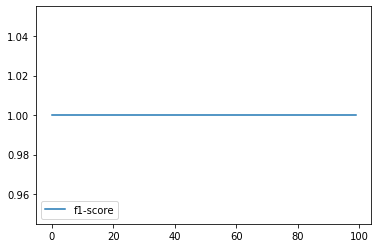

decision tree


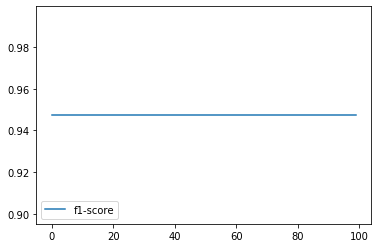

gradient boosted tree


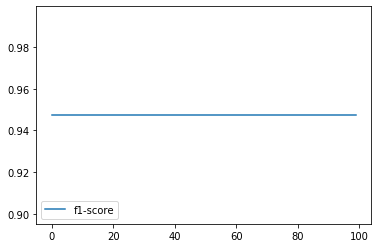

random forest


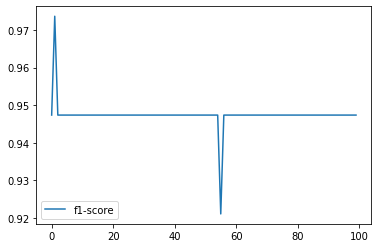

In [56]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data(i):
    X, y = datasets.load_iris(return_X_y=True)
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        if seed_varies:
            np.random.seed(i)
        X_train, X_test, y_train, y_test = get_data(max_seed)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
variable_accuracy = get_accuracy(max_seed, seed_varies)
plot_accuracy(variable_accuracy)

logistic_regression


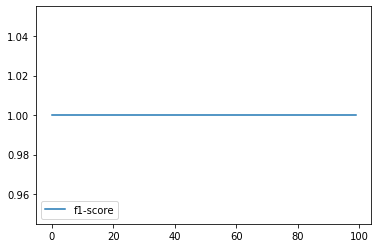

decision tree


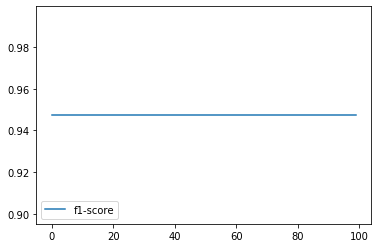

gradient boosted tree


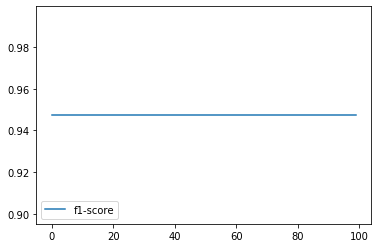

random forest


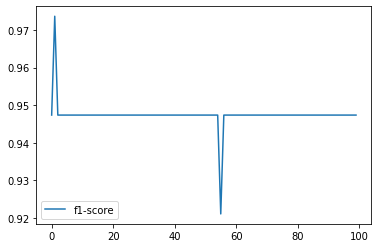

In [5]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data(i):
    X, y = datasets.load_iris(return_X_y=True)
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(
    X_train, X_test, y_train, 
    y_test, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        if seed_varies:
            np.random.seed(i)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
X_train, X_test, y_train, y_test = get_data(max_seed)
variable_accuracy = get_accuracy(
    X_train, X_test, y_train, 
    y_test, max_seed, seed_varies
)
plot_accuracy(variable_accuracy)

global i 99
local i 0
local i 1
local i 2
local i 3
local i 4
local i 5
local i 6
local i 7
local i 8
local i 9
local i 10
local i 11
local i 12
local i 13
local i 14
local i 15
local i 16
local i 17
local i 18
local i 19
local i 20
local i 21
local i 22
local i 23
local i 24
local i 25
local i 26
local i 27
local i 28
local i 29
local i 30
local i 31
local i 32
local i 33
local i 34
local i 35
local i 36
local i 37
local i 38
local i 39
local i 40
local i 41
local i 42
local i 43
local i 44
local i 45
local i 46
local i 47
local i 48
local i 49
local i 50
local i 51
local i 52
local i 53
local i 54
local i 55
local i 56
local i 57
local i 58
local i 59
local i 60
local i 61
local i 62
local i 63
local i 64
local i 65
local i 66
local i 67
local i 68
local i 69
local i 70
local i 71
local i 72
local i 73
local i 74
local i 75
local i 76
local i 77
local i 78
local i 79
local i 80
local i 81
local i 82
local i 83
local i 84
local i 85
local i 86
local i 87
local i 88
local i 89
local i 

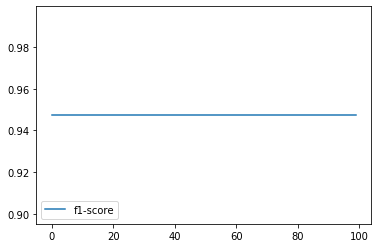

decision tree


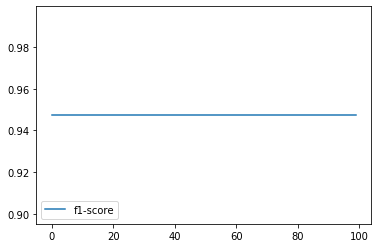

gradient boosted tree


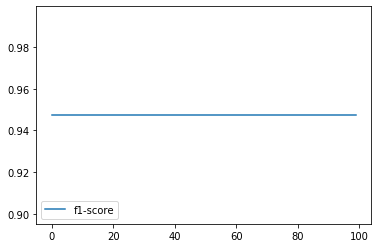

random forest


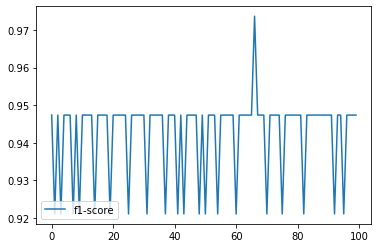

In [58]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data():
    X, y = datasets.load_iris(return_X_y=True)
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        print("local i", i)
        if seed_varies:
            np.random.seed(i)
        X_train, X_test, y_train, y_test = get_data()
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()
        
max_seed = 100
seed_varies = True
print("global i", i)
variable_accuracy = get_accuracy(max_seed, seed_varies)
print("global i", i)
plot_accuracy(variable_accuracy)

global i 99
local i 0
local i 1
local i 2
local i 3
local i 4
local i 5
local i 6
local i 7
local i 8
local i 9
local i 10
local i 11
local i 12
local i 13
local i 14
local i 15
local i 16
local i 17
local i 18
local i 19
local i 20
local i 21
local i 22
local i 23
local i 24
local i 25
local i 26
local i 27
local i 28
local i 29
local i 30
local i 31
local i 32
local i 33
local i 34
local i 35
local i 36
local i 37
local i 38
local i 39
local i 40
local i 41
local i 42
local i 43
local i 44
local i 45
local i 46
local i 47
local i 48
local i 49
local i 50
local i 51
local i 52
local i 53
local i 54
local i 55
local i 56
local i 57
local i 58
local i 59
local i 60
local i 61
local i 62
local i 63
local i 64
local i 65
local i 66
local i 67
local i 68
local i 69
local i 70
local i 71
local i 72
local i 73
local i 74
local i 75
local i 76
local i 77
local i 78
local i 79
local i 80
local i 81
local i 82
local i 83
local i 84
local i 85
local i 86
local i 87
local i 88
local i 89
local i 

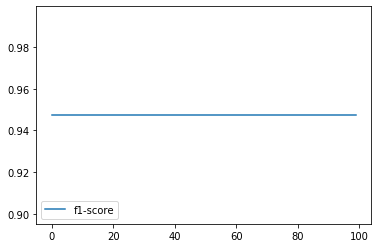

decision tree


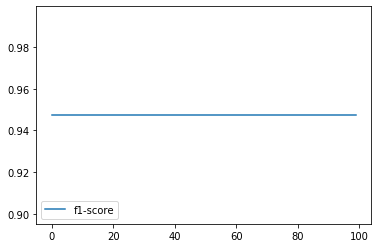

gradient boosted tree


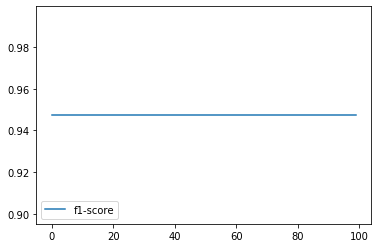

random forest


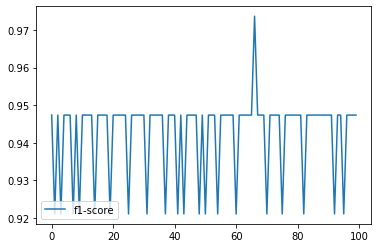

In [7]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def get_data():
    X, y = datasets.load_iris(return_X_y=True)
    return train_test_split(
        X, y, random_state=i
    )

def get_predictions(clfs, X_test):
    return [clf.predict(X_test) for clf in clfs]

def store_results(variable_accuracy, predictions, y_test):
    tmps = []
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        tmps.append(tmp)
    return tmps

def get_accuracy(X_train, X_test, y_train, y_test, max_seed, seed_varies):    
    variable_accuracy = []
    if not seed_varies:
        np.random.seed(max_seed)
    for i in range(max_seed):
        print("local i", i)
        if seed_varies:
            np.random.seed(i)
        clfs = train_clfs(X_train, y_train)
        predictions = get_predictions(clfs, X_test)
        
        variable_accuracy += store_results(
            variable_accuracy, predictions, y_test
        )
    return variable_accuracy

def plot_accuracy(accuracy):
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]

    for clf in clf_names:
        print(clf)
        f1 = [elem["f1_score"] 
              for elem in accuracy 
              if elem["clf"] == clf]
        seed = list(range(len(f1)))
        plt.plot(seed, f1, label="f1-score")
        plt.legend(loc='lower left')

        plt.show()

i = 99
max_seed = 100
seed_varies = True
print("global i", i)
X_train, X_test, y_train, y_test = get_data()
variable_accuracy = get_accuracy(X_train, X_test, y_train, y_test, max_seed, seed_varies)
print("global i", i)
plot_accuracy(variable_accuracy)

logistic_regression


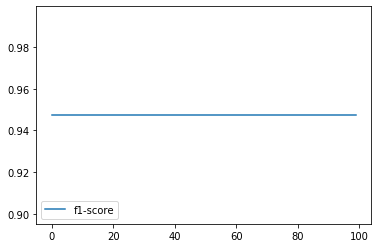

decision tree


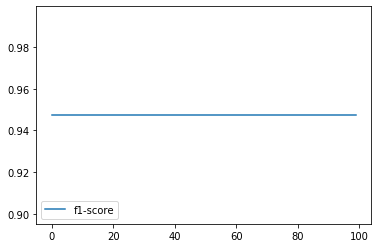

gradient boosted tree


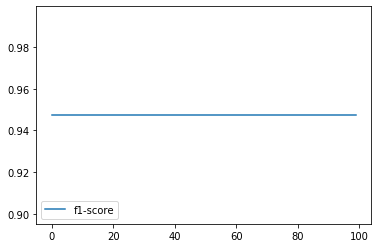

random forest


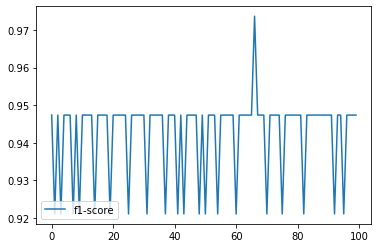

In [59]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

constant_accuracy = []
for i in range(100):
    np.random.seed(i)
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=99
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(recall)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

logistic_regression


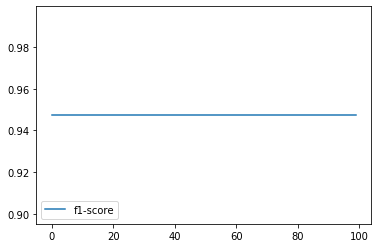

decision tree


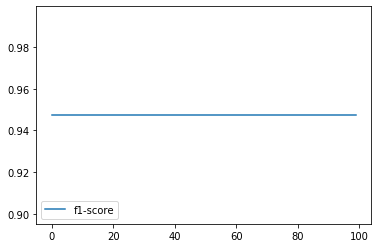

gradient boosted tree


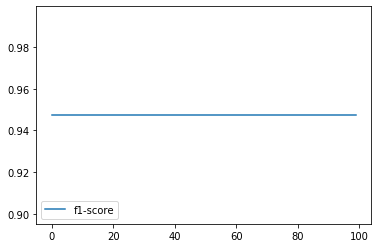

random forest


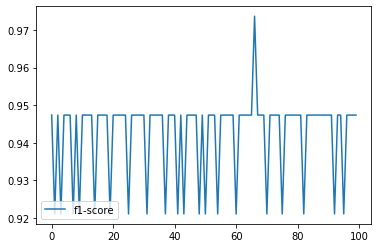

In [61]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

def train_test_splitter(X, y, state):
    return train_test_split(
        X, y, random_state=state
    )
constant_accuracy = []
for i in range(100):
    np.random.seed(i)
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_splitter(X, y, 99) 
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(recall)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

logistic_regression


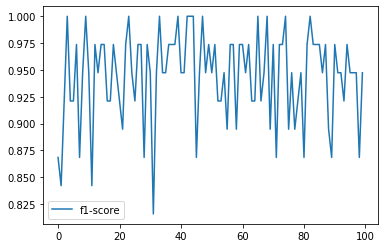

decision tree


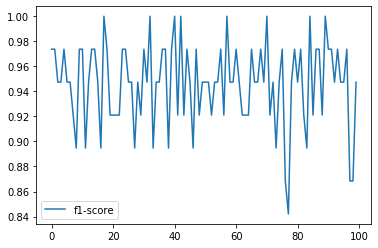

gradient boosted tree


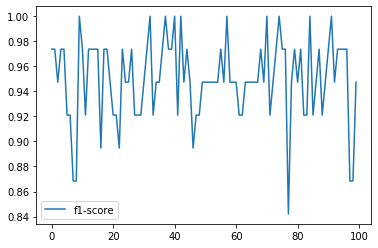

random forest


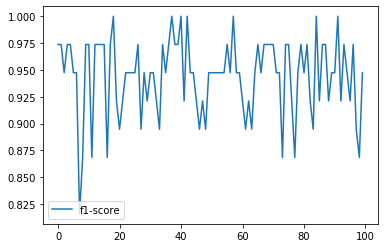

In [52]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

constant_accuracy = []
for i in range(100):
    np.random.seed(i)
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=i
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(recall)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

Here the random seed changes from 0 - 99.

logistic_regression


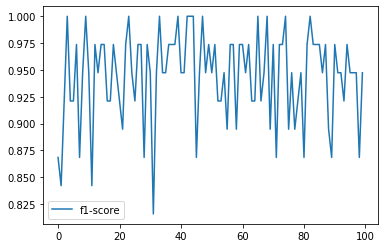

decision tree


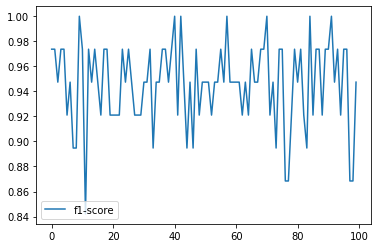

gradient boosted tree


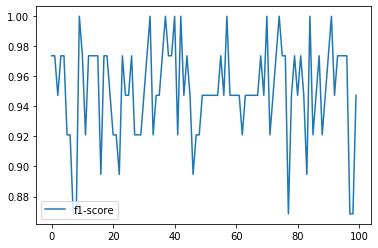

random forest


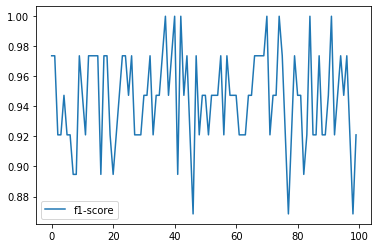

In [51]:
def train_clfs(X_train, y_train):
    clfs = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        RandomForestClassifier()
    ]
    for clf in clfs:
        clf.fit(X_train, y_train)
    return clfs

constant_accuracy = []
np.random.seed(10)
for i in range(100):
    X, y = datasets.load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=i
    )
    clfs = train_clfs(X_train, y_train)
    predictions = [clf.predict(X_test) for clf in clfs]
    clf_names = [
        "logistic_regression", 
        "decision tree",
        "gradient boosted tree",
        "random forest"
    ]
    for index, prediction in enumerate(predictions):
        tmp = {}
        tmp["clf"] = clf_names[index]
        tmp["f1_score"] = f1_score(
            y_test, prediction, average="micro"
        )
        constant_accuracy.append(tmp)

for clf in clf_names:
    print(clf)
    f1 = [elem["f1_score"] 
                for elem in constant_accuracy 
                if elem["clf"] == clf]
    seed = list(range(len(recall)))
    plt.plot(seed, f1, label="f1-score")
    plt.legend(loc='lower left')

    plt.show()

Here the random seed is fixed at 10 (arbitrarily)

Now let's compare the CDFs in the constant case, version the variable case.

logistic_regression


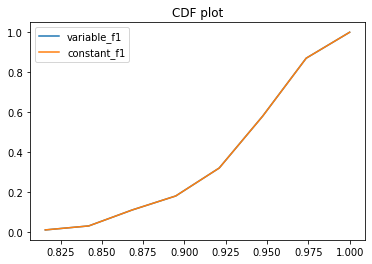

decision tree


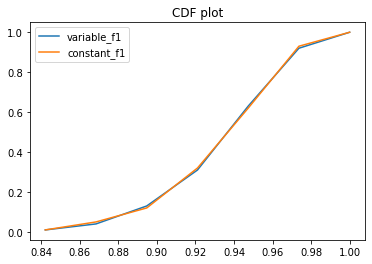

gradient boosted tree


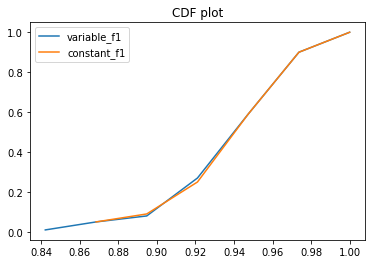

random forest


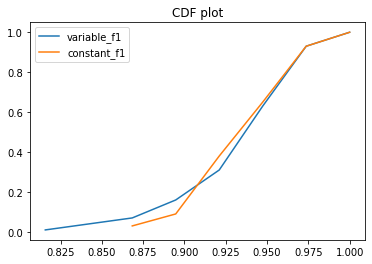

In [47]:
def plot_cdfs(dist_one, dist_name_one, dist_two, dist_name_two):
    cdf_one = CDF(dist_one)
    cdf_two = CDF(dist_two)
    plt.plot(cdf_one.xs, cdf_one.ps, label=dist_name_one)
    plt.plot(cdf_two.xs, cdf_two.ps, label=dist_name_two)
    plt.title("CDF plot")
    plt.legend(loc='upper left')
    plt.show()
    
for clf in clf_names:
    print(clf)
    variable_f1 = [elem["f1_score"] 
          for elem in variable_accuracy 
          if elem["clf"] == clf]

    constant_f1 = [elem["f1_score"] 
          for elem in constant_accuracy 
          if elem["clf"] == clf]

    plot_cdfs(variable_f1, "variable_f1", constant_f1, "constant_f1")